# 2025/10/31


# 2 Quantum Basics: From States to Circuits and Protocols

## 2.a Quantum Circuit Visulizations

### Tutorial 1: Visualize circuits

In [1]:
from qiskit import QuantumCircuit

## Draw a quantum circuit

The `QuantumCircuit` class supports drawing circuits through the `draw()` method, or by printing the circuit object. By default, both render an ASCII art version of the circuit diagram.

Note that `print` returns `None` but has the side effect of printing the diagram, whereas `QuantumCircuit.draw` returns the diagram with no side effects. Since Jupyter notebooks display the output of the last line of each cell, they appear to have the same effect.



In [2]:
# Build a quantum circuit
# have 3 qubits
circuit = QuantumCircuit(3, 3)

# apply X to q_1
circuit.x(1)

# apply hardmard to all 3 (range (3)) refers to all three)
circuit.h(range(3))

# apply control-X, control by 0, apply on 1
circuit.cx(0, 1)

# measure all 3 qubits
circuit.measure(range(3), range(3));

In [3]:
print(circuit)

     ┌───┐          ┌─┐   
q_0: ┤ H ├───────■──┤M├───
     ├───┤┌───┐┌─┴─┐└╥┘┌─┐
q_1: ┤ X ├┤ H ├┤ X ├─╫─┤M├
     ├───┤└┬─┬┘└───┘ ║ └╥┘
q_2: ┤ H ├─┤M├───────╫──╫─
     └───┘ └╥┘       ║  ║ 
c: 3/═══════╩════════╩══╩═
            2        0  1 


In [4]:
circuit.draw()

┌───┐          ┌─┐   
q_0: ┤ H ├───────■──┤M├───
     ├───┤┌───┐┌─┴─┐└╥┘┌─┐
q_1: ┤ X ├┤ H ├┤ X ├─╫─┤M├
     ├───┤└┬─┬┘└───┘ ║ └╥┘
q_2: ┤ H ├─┤M├───────╫──╫─
     └───┘ └╥┘       ║  ║ 
c: 3/═══════╩════════╩══╩═
            2        0  1

### Alternative renderers

A text output is useful for quickly seeing the output while developing a circuit, but it doesn't provide the most flexibility. There are two alternative output renderers for the quantum circuit. One uses [Matplotlib](https://matplotlib.org/) and the other uses [LaTeX](https://www.latex-project.org/). The LaTeX renderer requires the [qcircuit package](https://github.com/CQuIC/qcircuit). Select these renderers by setting the "output" argument to the strings `mpl` and `latex`.



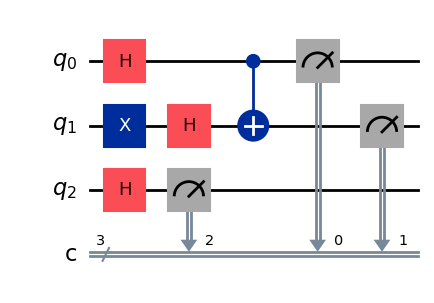

In [5]:
# Matplotlib drawing
circuit.draw(output="mpl")

### Save output

Drawing a large-scale circuit inline in a Jupyter notebook can be slow or unreadable.
You can save the diagram directly to a file, then open it in an image viewer and zoom in as needed.



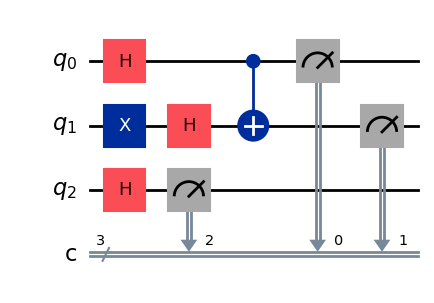

In [7]:
# Save as an image using the Matplotlib drawer
circuit.draw(output="mpl", filename="circuit-mpl.jpeg")

### Control circuit drawings

By default, the `draw()` method returns the rendered image as an object and does not output anything. The exact class returned depends on the output specified: `'text'` (the default) returns a `TextDrawer` object, `'mpl'` returns a `matplotlib.Figure` object, and `latex` returns a `PIL.Image` object. Jupyter notebooks understand these return types and render them properly, but when running outside of Jupyter, images will not display automatically.

The `draw()` method has optional arguments to display or save the output. When specified, the `filename` kwarg takes a path to which it saves the rendered output. Alternatively, if you're using the `mpl` or `latex` outputs, you can use the `interactive` kwarg to open the image in a new window (this will not always work from within a notebook).



### Customize the output

Depending on the output, there are also options to customize the circuit diagram.

#### Disable plot barriers and reverse bit order

The first two options are shared among all three backends. They allow you to configure both the bit orders and whether or not you draw barriers. These can be set by the `reverse_bits` kwarg and `plot_barriers` kwarg, respectively. The following examples work with any output renderer; `mpl` is used here for brevity.



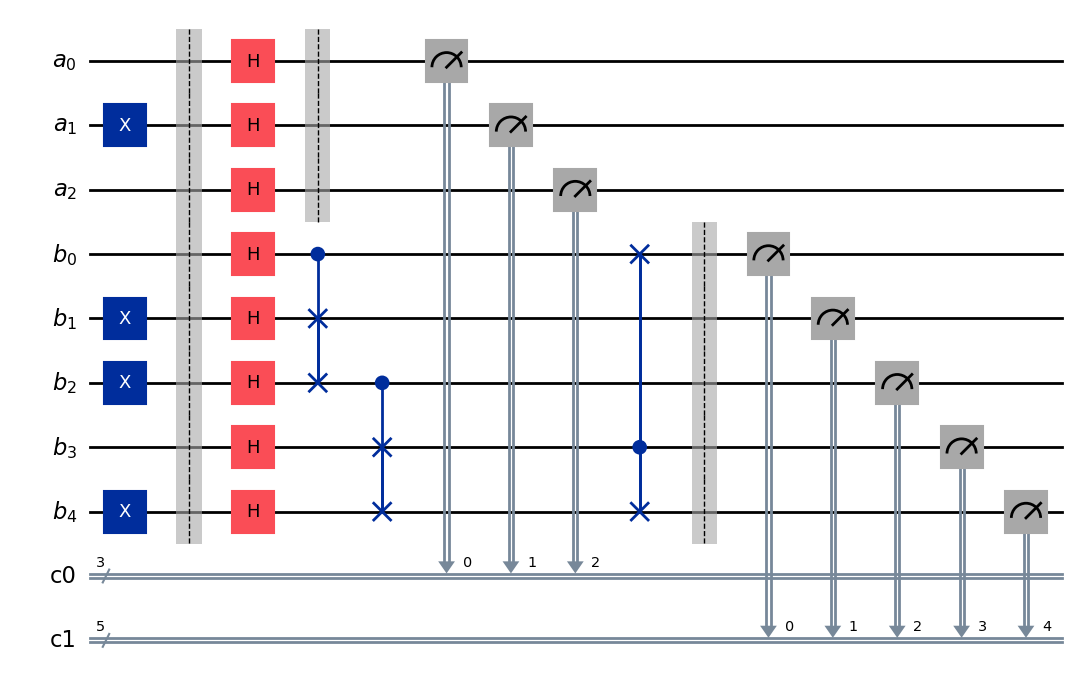

In [8]:
from qiskit import QuantumRegister, ClassicalRegister

# Draw a new circuit with barriers and more registers
q_a = QuantumRegister(3, name="a")
q_b = QuantumRegister(5, name="b")
c_a = ClassicalRegister(3)
c_b = ClassicalRegister(5)

circuit = QuantumCircuit(q_a, q_b, c_a, c_b)
circuit.x(q_a[1])
circuit.x(q_b[1])
circuit.x(q_b[2])
circuit.x(q_b[4])
circuit.barrier()
circuit.h(q_a)
circuit.barrier(q_a)
circuit.h(q_b)
circuit.cswap(q_b[0], q_b[1], q_b[2])
circuit.cswap(q_b[2], q_b[3], q_b[4])
circuit.cswap(q_b[3], q_b[4], q_b[0])
circuit.barrier(q_b)
circuit.measure(q_a, c_a)
circuit.measure(q_b, c_b);

# Draw the circuit
circuit.draw(output="mpl")

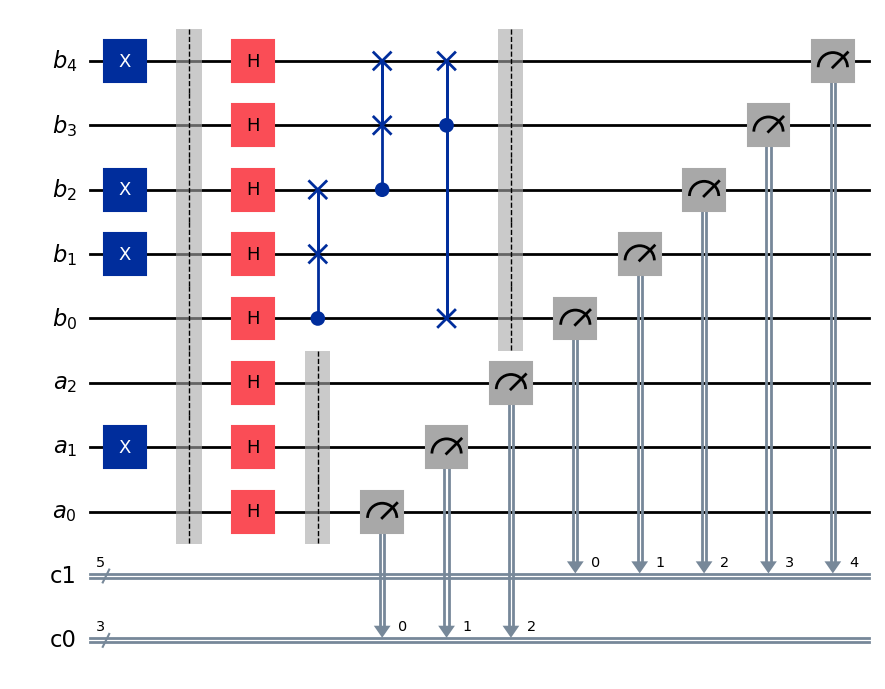

In [9]:
# Draw the circuit with reversed bit order
circuit.draw(output="mpl", reverse_bits=True)

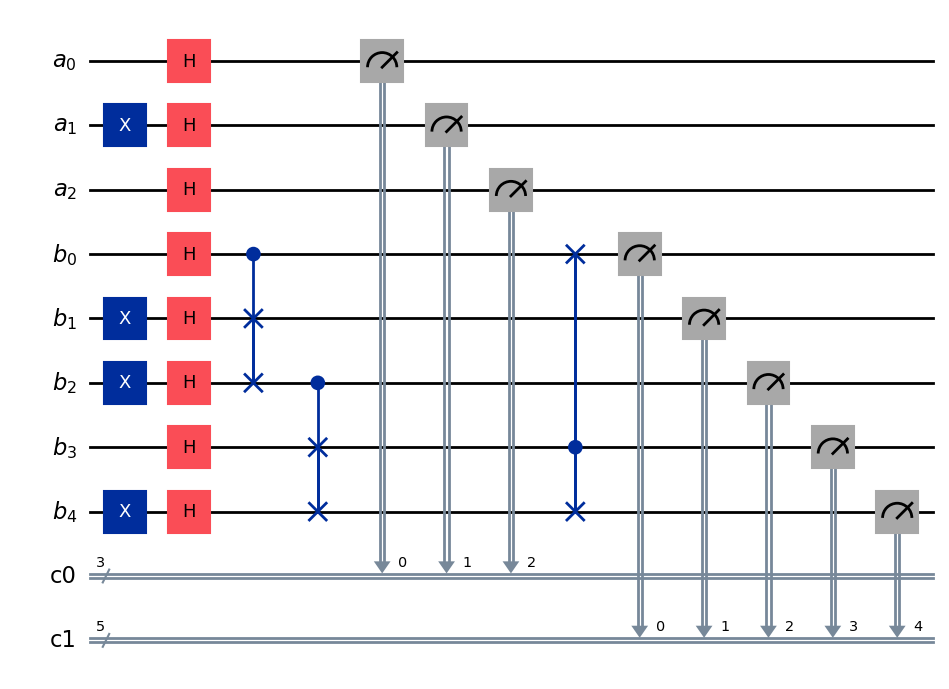

In [10]:
# Draw the circuit without barriers
circuit.draw(output="mpl", plot_barriers=False)

### Renderer-specific customizations

Some available customizing options are specific to a renderer.

The `fold` argument sets a maximum width for the output. In the `text` renderer, this sets the length of the lines of the diagram before it is wrapped to the next line.  When using the 'mpl' renderer, this is the number of (visual) layers before folding to the next line.

The `mpl` renderer has the `style` kwarg, which changes the colors and outlines. See the [API documentation](/docs/api/qiskit/qiskit.circuit.QuantumCircuit#draw) for more details.

The `scale` option scales the output of the `mpl` and `latex` renderers.



In [11]:
circuit = QuantumCircuit(1)
for _ in range(10):
    circuit.h(0)
# limit line length to 40 characters
circuit.draw(output="text", fold=40)

┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐»
q: ┤ H ├┤ H ├┤ H ├┤ H ├┤ H ├┤ H ├┤ H ├»
   └───┘└───┘└───┘└───┘└───┘└───┘└───┘»
«   ┌───┐┌───┐┌───┐
«q: ┤ H ├┤ H ├┤ H ├
«   └───┘└───┘└───┘

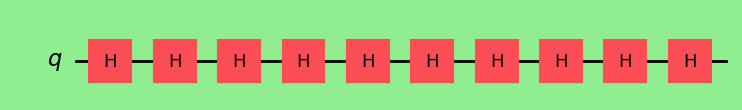

In [12]:
# Change the background color in mpl

style = {"backgroundcolor": "lightgreen"}
circuit.draw(output="mpl", style=style)

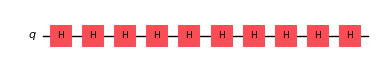

In [13]:
# Scale the mpl output to 1/2 the normal size
circuit.draw(output="mpl", scale=0.5)

### Standalone circuit-drawing function

If you have an application where you prefer to draw a circuit with a self-contained function instead of as a method of a circuit object, you can directly use the `circuit_drawer()` function, which is part of the public stable interface from `qiskit.visualization`. The function behaves identically to the `circuit.draw()` method, except that it takes in a circuit object as a required argument.



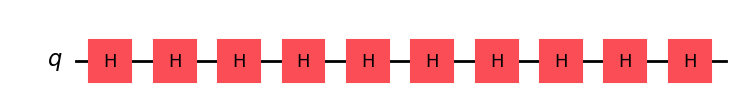

In [14]:
from qiskit.visualization import circuit_drawer

circuit_drawer(circuit, output="mpl", plot_barriers=False)

## Tutorial 2: Plot quantum states

In many situations – such as learning or debugging – it's helpful to visualize the state of a quantum computer. Here we assume you already have a particular state from simulation or state tomography.  It's only possible to view the states of small quantum systems.

<Admonition title="Using the output from functions" type="tip">
  All functions on this page return rich objects. When the last line of a code cell outputs these objects, Jupyter notebooks display them below the cell. If you call these functions in some other environments or in scripts, you will need to explicitly show or save the outputs.

  Most functions return images, which are `matplotlib.Figure` objects. Two options are:

  *   Call `.show()` on the returned object to open the image in a new window (assuming your configured matplotlib backend is interactive).
  *   Call `.savefig("out.png")` to save the figure to `out.png` in the current working directory. The `savefig()` method takes a path so you can adjust the location and filename where you're saving the output. For example, `plot_state_city(psi).savefig("out.png")`.

  The LaTeX outputs are `IPython.display.Latex` objects. The best option in a non-Jupyter environment is to avoid this output by either printing the state for a text representation, or switching to the `latex_source` drawer to return a LaTeX source string.
</Admonition>

A quantum state is either a density matrix $\rho$ (Hermitian matrix) or statevector $|\psi\rangle$ (complex vector). The density matrix is related to the statevector by

$\rho = |\psi\rangle\langle \psi|,$

and is more general, as it can represent mixed states (positive sum of statevectors)

$\rho = \sum_k p_k |\psi_k\rangle\langle \psi_k |.$

Qiskit represents quantum states through the `Statevector` and `DensityMatrix` classes and provides many visualization functions. See the sections after the following the code cell to see how Qiskit's different visualization functions plot the following quantum state.



In [15]:
from math import pi
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

# Create a Bell state for demonstration
qc = QuantumCircuit(2)
qc.h(0)
qc.crx(pi / 2, 0, 1)
psi = Statevector(qc)

### City
This plot displays the real and imaginary parts of each density-matrix element as two 3D bar charts.

The state we’re plotting has density matrix
$$
\begin{bmatrix}
\frac{1}{2} & \frac{\sqrt{2}}{4} & 0 & \frac{\sqrt{2} i}{4}  \\
\frac{\sqrt{2}}{4} & \frac{1}{4} & 0 & \frac{i}{4}  \\
0 & 0 & 0 & 0  \\
- \frac{\sqrt{2} i}{4} & - \frac{i}{4} & 0 & \frac{1}{4}  \\
\end{bmatrix}
=
\underbrace{\begin{bmatrix}
\frac{1}{2} & \frac{\sqrt{2}}{4} & 0 & 0 \\
\frac{\sqrt{2}}{4} & \frac{1}{4} & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & \frac{1}{4}
\end{bmatrix}}_{\text{Real part}}
\;+\;
i\,\underbrace{\begin{bmatrix}
0 & 0 & 0 & \frac{\sqrt{2}}{4} \\
0 & 0 & 0 & \frac{1}{4} \\
0 & 0 & 0 & 0 \\
-\frac{\sqrt{2}}{4} & -\frac{1}{4} & 0 & 0
\end{bmatrix}}_{\text{Imag part (real numbers)}}
$$


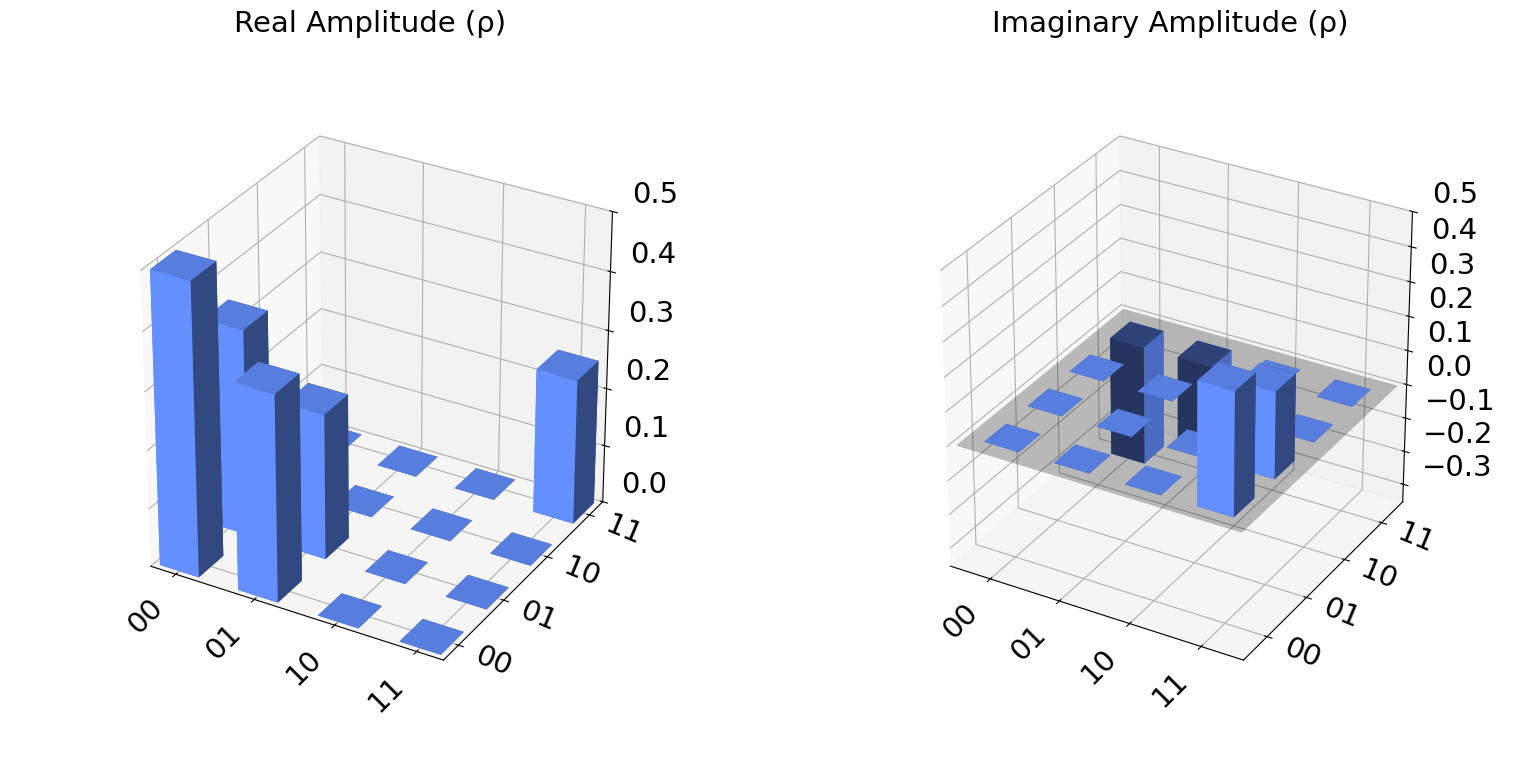

In [16]:
from qiskit.visualization import plot_state_city
 
plot_state_city(psi)
# Alternative: psi.draw("city")

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

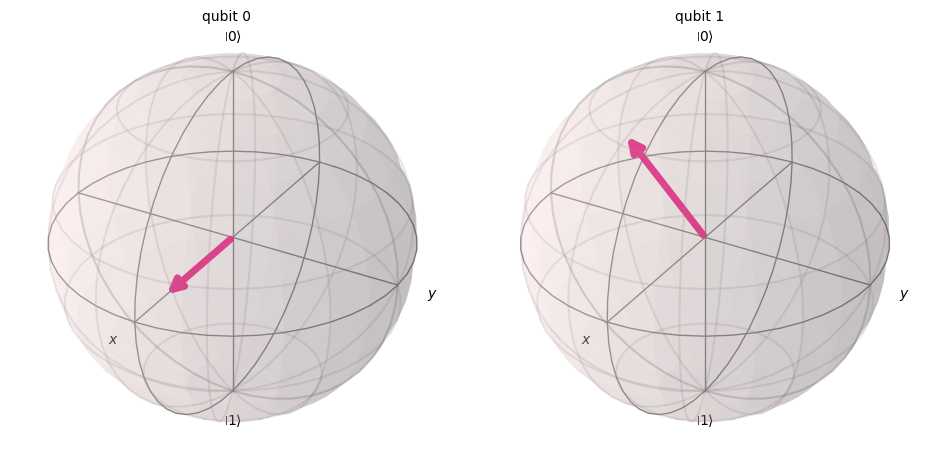

In [17]:
# !pip install qiskit  # uncomment if needed

import numpy as np
from qiskit.quantum_info import Statevector, DensityMatrix
from qiskit.visualization import (
    plot_state_city, plot_state_hinton, plot_state_paulivec, plot_state_qsphere, plot_bloch_multivector
)
from IPython.display import display, Latex

# Example state (your matrix from the text)
rho = np.array([
    [1/2,  np.sqrt(2)/4, 0,         1j*np.sqrt(2)/4],
    [np.sqrt(2)/4, 1/4,  0,         1j/4],
    [0,             0,   0,         0],
    [-1j*np.sqrt(2)/4, -1j/4, 0,    1/4]
], dtype=complex)

dm = DensityMatrix(rho)

# LaTeX rendering (works nicely in Jupyter)
sv = Statevector([1, 0])  # example statevector
display(dm.draw('latex'))               # pretty LaTeX for density matrix
display(Latex(dm.draw('latex_source'))) # raw LaTeX source
display(sv.draw('latex'))               # pretty LaTeX for statevector
display(Latex(sv.draw('latex_source'))) # raw LaTeX source

# Plots
plot_state_city(dm)        # "City" plot
plot_state_hinton(dm)      # Hinton plot
plot_state_paulivec(dm)    # Pauli-vector bar chart
plot_state_qsphere(dm)     # Qsphere (mixed states supported)
plot_bloch_multivector(dm) # Bloch spheres per qubit (projection)


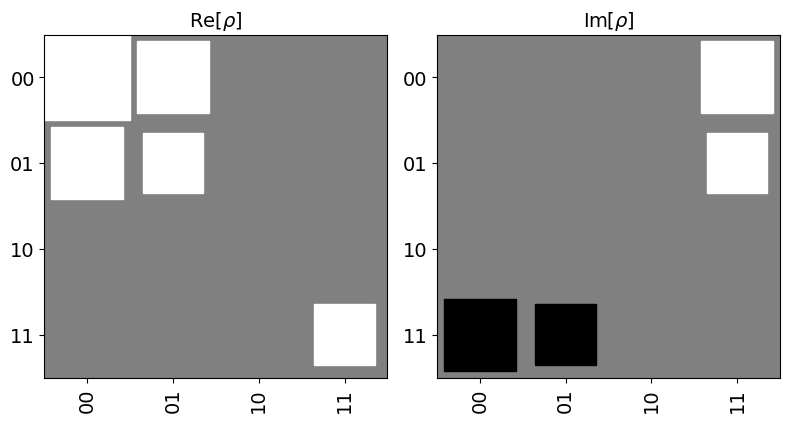

In [18]:
from qiskit.visualization import plot_state_hinton

plot_state_hinton(psi)
# Alternative: psi.draw("hinton")

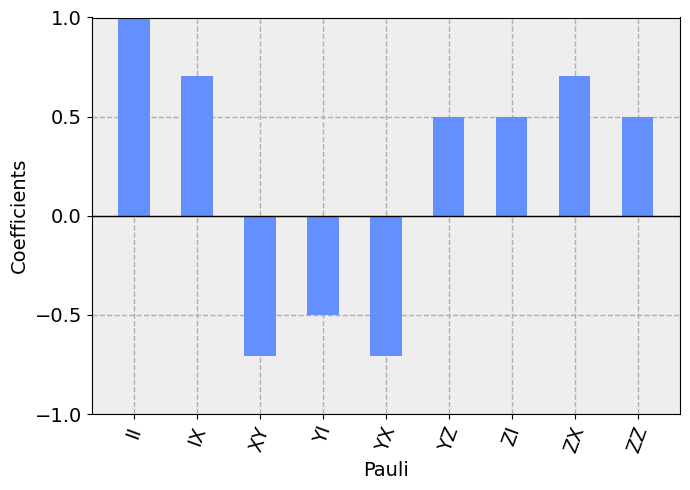

In [19]:
from qiskit.visualization import plot_state_paulivec

plot_state_paulivec(psi)
# Alternative: psi.draw("paulivec")

In [20]:
from qiskit.quantum_info import SparsePauliOp

SparsePauliOp.from_operator(psi)

SparsePauliOp(['II', 'IX', 'XY', 'YI', 'YX', 'YZ', 'ZI', 'ZX', 'ZZ'],
              coeffs=[ 0.25     +0.j,  0.1767767+0.j, -0.1767767+0.j, -0.125    +0.j,
 -0.1767767+0.j,  0.125    +0.j,  0.125    +0.j,  0.1767767+0.j,
  0.125    +0.j])

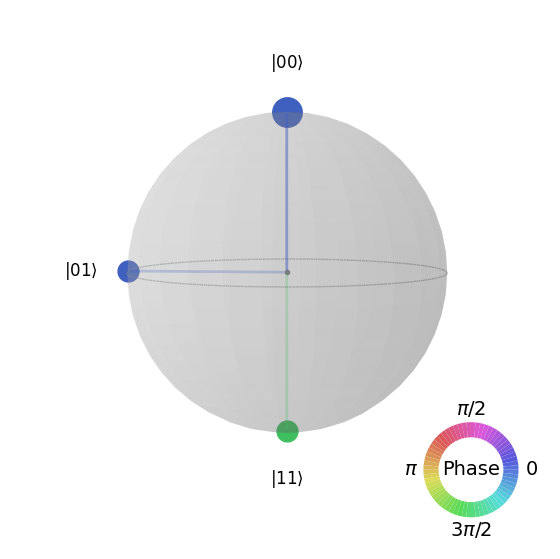

In [21]:
from qiskit.visualization import plot_state_qsphere

plot_state_qsphere(psi)
# Alternative: psi.draw("qsphere")

### Tutorial 3: IBM Quantum Composer

As the composer is a external method, no content will be shown here, but try and use the composer. 

## 2.b Basic Quantum Protocols

# Deutsch's algorithm

Deutsch's algorithm solves the parity problem for the special case that $n = 1.$
In the context of quantum computing this problem is sometimes referred to as *Deutsch's problem*, and we'll follow that nomenclature in this lesson.

To be precise, the input is represented by a function $f:\Sigma \rightarrow \Sigma$ from one bit to one bit.
There are four such functions:

$$
\rule[-10mm]{0mm}{10mm}
\begin{array}{c|c}
  a & f_1(a)\\
  \hline
  0 & 0\\
  1 & 0
\end{array}
\qquad
\begin{array}{c|c}
  a & f_2(a)\\
  \hline
  0 & 0\\
  1 & 1
\end{array}
\qquad
\begin{array}{c|c}
  a & f_3(a)\\
  \hline
  0 & 1\\
  1 & 0
\end{array}
\qquad
\begin{array}{c|c}
  a & f_4(a)\\
  \hline
  0 & 1\\
  1 & 1
\end{array}
$$

The first and last of these functions are *constant* and the middle two are *balanced*, meaning that the two possible output values for the function occur the same number of times as we range over the inputs.
Deutsch's problem is to determine which of these two categories the input function belongs to: constant or balanced.

<Figure title="Deutsch's problem">
  Input:  a function $f:\{0,1\}\rightarrow\{0,1\}$ \
  Output: $0$ if $f$ is constant, $1$ if $f$ is balanced
</Figure>

If we view the input function $f$ in Deutsch's problem as representing random access to a string, we're thinking about a two-bit string: $f(0)f(1).$

$$
\begin{array}{cc}
\mathsf{function} & \mathsf{string}\\
\hline
f_1 & 00 \\
f_2 & 01 \\
f_3 & 10 \\
f_4 & 11
\end{array}
$$

When viewed in this way, Deutsch's problem is to compute the parity (or, equivalently, the exclusive-OR) of the two bits.

Every classical query algorithm that correctly solves this problem must query both bits: $f(0)$ and $f(1).$
If we learn that $f(1) = 1,$ for instance, the answer could still be $0$ or $1,$ depending on whether $f(0) = 1$ or $f(0) = 0,$ respectively.
Every other case is similar; knowing just one of two bits doesn't provide any information at all about their parity.
So, the Boolean circuit described in the previous section is the best we can do in terms of the number of queries required to solve this problem.

## Quantum circuit description

Deutsch's algorithm solves Deutsch's problem using a single query, therefore providing a quantifiable advantage of quantum over classical computations.
This may be a modest advantage — one query as opposed to two — but we have to start somewhere.
Scientific advances sometimes have seemingly humble origins.

## Analysis

The initial state is $\vert 1\rangle \vert 0 \rangle,$ and the two Hadamard operations on the left-hand side of the circuit transform this state to

$$
\vert \pi_1 \rangle = \vert - \rangle \vert + \rangle
= \frac{1}{2} \bigl( \vert 0\rangle - \vert 1\rangle \bigr) \vert 0\rangle
+ \frac{1}{2} \bigl( \vert 0\rangle - \vert 1\rangle \bigr) \vert 1\rangle.
$$

(As always, we're following Qiskit's qubit ordering convention, which puts the top qubit to the right and the bottom qubit to the left.)

Next, the $U_f$ gate is performed.
According to the definition of the $U_f$ gate, the value of the function $f$ for the classical state of the top/rightmost qubit is XORed onto the bottom/leftmost qubit, which transforms $\vert \pi_1\rangle$ into the state

$$
\vert \pi_2 \rangle
= \frac{1}{2} \bigl( \vert 0 \oplus f(0) \rangle - \vert 1 \oplus f(0) \rangle \bigr) \vert 0 \rangle
+ \frac{1}{2} \bigl( \vert 0 \oplus f(1) \rangle - \vert 1 \oplus f(1) \rangle \bigr) \vert 1 \rangle.
$$

We can simplify this expression by observing that the formula

$$
\vert 0 \oplus a\rangle - \vert 1 \oplus a\rangle = (-1)^a \bigl( \vert 0\rangle - \vert 1\rangle \bigr)
$$

works for both possible values $a\in\Sigma.$
More explicitly, the two cases are as follows.

$$
\begin{aligned}
\vert 0 \oplus 0\rangle - \vert 1 \oplus 0\rangle
& = \vert 0 \rangle - \vert 1 \rangle
= (-1)^0 \bigl( \vert 0\rangle - \vert 1\rangle \bigr)\\
\vert 0 \oplus 1\rangle - \vert 1 \oplus 1\rangle & = \vert 1 \rangle - \vert 0\rangle
= (-1)^1 \bigl( \vert 0\rangle - \vert 1\rangle \bigr)
\end{aligned}
$$

Thus, we can alternatively express $\vert\pi_2\rangle$ like this:

$$
\begin{aligned}
  \vert\pi_2\rangle
  & = \frac{1}{2} (-1)^{f(0)} \bigl( \vert 0 \rangle - \vert 1 \rangle \bigr) \vert 0 \rangle
  + \frac{1}{2} (-1)^{f(1)} \bigl( \vert 0 \rangle - \vert 1 \rangle \bigr) \vert 1 \rangle \\
  & = \vert - \rangle \biggl( \frac{(-1)^{f(0)} \vert 0\rangle + (-1)^{f(1)} \vert 1\rangle}{\sqrt{2}}\biggr).
\end{aligned}
$$

Something interesting just happened!
Although the action of the $U_f$ gate on standard basis states leaves the top/rightmost qubit alone and XORs the function value onto the bottom/leftmost qubit, here we see that the state of the top/rightmost qubit has changed (in general) while the state of the bottom/leftmost qubit remains the same — specifically being in the $\vert - \rangle$ state before and after the $U_f$ gate is performed.
This phenomenon is known as the *phase kickback*, and we will have more to say about it shortly.

With one final simplification, which is to pull the factor of $(-1)^{f(0)}$ outside of the sum, we obtain this expression of the state $\vert\pi_2\rangle$:

$$
\begin{aligned}
  \vert\pi_2\rangle
  & = (-1)^{f(0)} \vert - \rangle
      \biggl( \frac{\vert 0\rangle + (-1)^{f(0) \oplus f(1)} \vert 1\rangle}{\sqrt{2}}\biggr) \\
  & = \begin{cases}
        (-1)^{f(0)} \vert - \rangle \vert + \rangle & \text{if $f(0) \oplus f(1) = 0$}\\[1mm]
        (-1)^{f(0)} \vert - \rangle \vert - \rangle & \text{if $f(0) \oplus f(1) = 1$}.
      \end{cases}
\end{aligned}
$$

Notice that in this expression, we have $f(0) \oplus f(1)$ in the exponent of $-1$ as opposed to $f(1) - f(0),$ which is what we might expect from a purely algebraic viewpoint, but we obtain the same result either way.
This is because the value $(-1)^k$ for any integer $k$ depends only on whether $k$ is even or odd.

Applying the final Hadamard gate to the top qubit leaves us with the state

$$
\vert \pi_3 \rangle =
\begin{cases}
  (-1)^{f(0)} \vert - \rangle \vert 0 \rangle & \text{if $f(0) \oplus f(1) = 0$}\\[1mm]
  (-1)^{f(0)} \vert - \rangle \vert 1 \rangle & \text{if $f(0) \oplus f(1) = 1$},
\end{cases}
$$

which leads to the correct outcome with probability $1$ when the right/topmost qubit is measured.

## Further remarks on the phase kickback

Before moving on, let's look at the analysis above from a slightly different angle that may shed some light on the phase kickback phenomenon.

First, notice that the following formula works for all choices of bits $b,c\in\Sigma.$

$$
\vert b \oplus c\rangle = X^c \vert b \rangle
$$

This can be verified by checking it for the two possible values $c = 0$ and $c = 1$:

$$
\begin{aligned}
\vert b \oplus 0 \rangle & = \vert b\rangle = \mathbb{I} \vert b \rangle = X^0 \vert b \rangle\\
\vert b \oplus 1 \rangle & = \vert \neg b\rangle = X \vert b \rangle = X^1 \vert b \rangle.
\end{aligned}
$$

Using this formula, we see that

$$
U_f \bigl(\vert b\rangle \vert a \rangle\bigr)
= \vert b \oplus f(a) \rangle \vert a \rangle
= \bigl(X^{f(a)}\vert b \rangle\bigr) \vert a \rangle
$$

for every choice of bits $a,b\in\Sigma.$
Because this formula is true for $b=0$ and $b=1,$ we see by linearity that

$$
U_f \bigl( \vert \psi \rangle \vert a \rangle \bigr) = \bigl(X^{f(a)}\vert \psi \rangle\bigr) \vert a \rangle
$$

for all qubit state vectors $\vert \psi\rangle,$ and therefore

$$
U_f \bigl( \vert - \rangle \vert a \rangle \bigr) = \bigl(X^{f(a)} \vert - \rangle \bigr) \vert a \rangle
= (-1)^{f(a)} \vert - \rangle \vert a \rangle.
$$

The key that makes this work is that $X\vert - \rangle = - \vert - \rangle.$
In mathematical terms, the vector $\vert - \rangle$ is an *eigenvector* of the matrix $X$ having *eigenvalue* $-1.$

We'll discuss eigenvectors and eigenvalues in greater detail in the upcoming lesson on *Phase estimation and factoring,* where the phase kickback phenomenon is generalized to other unitary operations.

Keeping in mind that scalars float freely through tensor products, we find an alternative way of reasoning how the operation $U_f$ transforms $\vert \pi_1\rangle$ into $\vert \pi_2\rangle$ in the analysis above:

$$
\begin{aligned}
  \vert \pi_2 \rangle
  & = U_f \bigl( \vert - \rangle \vert + \rangle \bigr)\\
  & = \frac{1}{\sqrt{2}} U_f \bigl(\vert - \rangle \vert 0\rangle \bigr)
    + \frac{1}{\sqrt{2}} U_f \bigl(\vert - \rangle \vert 1\rangle \bigr)\\
  & = \vert - \rangle \biggl( \frac{(-1)^{f(0)} \vert 0\rangle + (-1)^{f(1)} \vert 1\rangle}{\sqrt{2}}\biggr).
\end{aligned}
$$



## Implementation in Qiskit

Now let's see how we can implement Deutsch's algorithm in Qiskit. We'll start with a version check and then perform the imports required solely for this implementation.
For the implementations of other algorithms that follows, we'll perform the required imports separately for the sake of greater modularity.



In [22]:
from qiskit import __version__
 
print(__version__)

2.2.1


In [23]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

First we'll define a quantum circuit that implements a query gate for one of the four functions $f_1,$ $f_2,$ $f_3,$ or $f_4$ from one bit to one bit described previously. As we already mentioned, the implementation of query gates is not really a part of Deutsch's algorithm itself;
here we're essentially just showing one way to prepare the input, in the form of a circuit implementation of a query gate.



In [24]:
def deutsch_function(case: int):
    # This function generates a quantum circuit for one of the 4 functions
    # from one bit to one bit
 
    if case not in [1, 2, 3, 4]:
        raise ValueError("`case` must be 1, 2, 3, or 4.")
 
    f = QuantumCircuit(2)
    if case in [2, 3]:
        f.cx(0, 1)
    if case in [3, 4]:
        f.x(1)
    return f

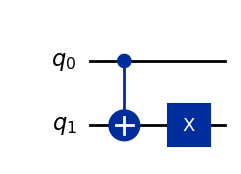

In [25]:
display(deutsch_function(3).draw(output="mpl"))

Next we will create the actual quantum circuit for Deutsch's algorithm, substituting the query gate with a quantum circuit implementation given as an argument. Shortly we'll plug in one of the four circuits defined by the function `deutsch_function` we defined earlier.
Barriers are included to show the visual separation between the query gate implementation and the rest of the circuit.



In [26]:
def compile_circuit(function: QuantumCircuit):
    # Compiles a circuit for use in Deutsch's algorithm.
 
    n = function.num_qubits - 1
    qc = QuantumCircuit(n + 1, n)
 
    qc.x(n)
    qc.h(range(n + 1))
 
    qc.barrier()
    qc.compose(function, inplace=True)
    qc.barrier()
 
    qc.h(range(n))
    qc.measure(range(n), range(n))
 
    return qc

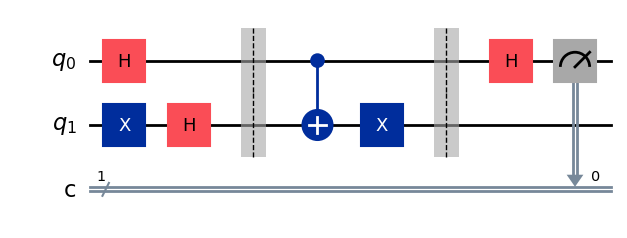

In [27]:
display(compile_circuit(deutsch_function(3)).draw(output="mpl"))

In [28]:
def deutsch_algorithm(function: QuantumCircuit):
    # Determine if a one-bit function is constant or balanced.
 
    qc = compile_circuit(function)
 
    result = AerSimulator().run(qc, shots=1, memory=True).result()
    measurements = result.get_memory()
    if measurements[0] == "0":
        return "constant"
    return "balanced"

In [29]:
f = deutsch_function(3)
display(deutsch_algorithm(f))

'balanced'

Here, we see how we get the result of balance or constant in a single trail.

# Quantum teleportation

Quantum teleportation, or just teleportation for short, is a protocol where a sender (Alice) transmits a qubit to a receiver (Bob) by making use of a shared entangled quantum state (one e-bit, to be specific) along with two bits of classical communication.
The name *teleportation* is meant to be suggestive of the concept in science fiction where matter is transported from one location to another by a futuristic process, but it must be understood that matter is not teleported in quantum teleportation — what is actually teleported is quantum information.

The set-up for teleportation is as follows.

We assume that Alice and Bob share an e-bit: Alice holds a qubit $\mathsf{A},$ Bob holds a qubit $\mathsf{B},$ and together the pair $(\mathsf{A},\mathsf{B})$ is in the state $\vert\phi^+\rangle.$
It could be, for instance, that Alice and Bob were in the same location in the past, they prepared the qubits $\mathsf{A}$ and $\mathsf{B}$ in the state $\vert \phi^+ \rangle,$ and then each went their own way with their qubit in hand.
Or, it could be that a different process, such as one involving a third party or a complex distributed process, was used to establish this shared e-bit.
These details are not part of the teleportation protocol itself.

Alice then comes into possession of a third qubit $\mathsf{Q}$ that she wishes to transmit to Bob.
The state of the qubit $\mathsf{Q}$ is considered to be *unknown* to Alice and Bob, and no assumptions are made about it.
For example, the qubit $\mathsf{Q}$ might be entangled with one or more other systems that neither Alice nor Bob can access.
To say that Alice wishes to transmit the qubit $\mathsf{Q}$ to Bob means that Alice would like Bob to be holding a qubit that is in the same state that $\mathsf{Q}$ was in at the start of the protocol, having whatever correlations that $\mathsf{Q}$ had with other systems, as if Alice had physically handed $\mathsf{Q}$ to Bob.

We could imagine that Alice physically sends the qubit $\mathsf{Q}$ to Bob, and if it reaches Bob without being altered or disturbed in transit, then Alice and Bob's task will be accomplished.
In the context of teleportation, however, it is our assumption that this is not feasible; Alice cannot send qubits directly to Bob.
She may, however, send classical information to Bob.

These are reasonable assumptions in a variety of settings.
For example, if Alice doesn't know Bob's exact location, or the distance between them is large, physically sending a qubit using the technology of today, or the foreseeable future, would be challenging to say the least.
However, as we know from everyday experiences, classical information transmission under these circumstances is quite straightforward.

At this point, one might ask whether it is possible for Alice and Bob to accomplish their task without even needing to make use of a shared e-bit.
In other words, is there any way to transmit a qubit using classical communication alone?

The answer is no, it is not possible to transmit quantum information using classical communication alone.
This is not too difficult to prove mathematically using basic quantum information theory, but we can alternatively rule out the possibility of transmitting qubits using classical communication alone by thinking about the no-cloning theorem.

Imagine that there was a way to send quantum information using classical communication alone.
Classical information can easily be copied and broadcast, which means that any classical transmission from Alice to Bob might also be received by a second receiver (Charlie, let us say).
But if Charlie receives the same classical communication that Bob received, then would he not also be able to obtain a copy of the qubit $\mathsf{Q}?$
This would suggest that $\mathsf{Q}$ was cloned, which we already know is impossible by the no-cloning theorem, and so we conclude that there is no way to send quantum information using classical communication alone.

When the assumption that Alice and Bob share an e-bit is in place, however, it is possible for Alice and Bob to accomplish their task.
This is precisely what the quantum teleportation protocol does.

## Protocol

Here is a quantum circuit diagram that describes the teleportation protocol:

![Teleportation circuit](/learning/images/courses/basics-of-quantum-information/entanglement-in-action/teleportation.svg)

The diagram is slightly stylized in that it depicts the separation between Alice and Bob, with two diagonal wires representing classical bits that are sent from Alice to Bob, but otherwise it is an ordinary quantum circuit diagram.
The qubit names are shown above the wires rather than to the left so that the initial states can be shown as well (which we will commonly do when it is convenient).
It should also be noted that the $X$ and $Z$ gates have *classical* controls, which simply means that the gates are not applied or applied depending on whether these classical control bits are $0$ or $1,$ respectively.

In words, the teleportation protocol is as follows:

1.  Alice performs a controlled-NOT operation on the pair $(\mathsf{A},\mathsf{Q}),$ with $\mathsf{Q}$ being the control and $\mathsf{A}$ being the target, and then performs a Hadamard operation on $\mathsf{Q}.$

2.  Alice then measures both $\mathsf{A}$ and $\mathsf{Q},$ with respect to a standard basis measurement in both cases, and transmits the classical outcomes to Bob. Let us refer to the outcome of the measurement of $\mathsf{A}$ as $a$ and the outcome of the measurement of $\mathsf{Q}$ as $b.$

3.  Bob receives $a$ and $b$ from Alice, and depending on the values of these bits he performs these operations:

    *   If $a = 1,$ then Bob performs a bit flip (or $X$ gate) on his qubit $\mathsf{B}.$
    *   If $b = 1,$ then Bob performs a phase flip (or $Z$ gate) on his qubit $\mathsf{B}.$

    That is, conditioned on $ab$ being $00,$ $01,$ $10,$ or $11,$ Bob performs one of the operations $\mathbb{I},$ $Z,$ $X,$ or $ZX$ on the qubit $\mathsf{B}.$

This is the complete description of the teleportation protocol.
The analysis that appears below reveals that when it is run, the qubit $\mathsf{B}$ will be in whatever state $\mathsf{Q}$ was in prior to the protocol being executed, including whatever correlations it had with any other systems — which is to say that the protocol has effectively implemented a perfect qubit communication channel, where the state of $\mathsf{Q}$ has been "teleported" into $\mathsf{B}.$

Before proceeding to the analysis, notice that this protocol does not succeed in cloning the state of $\mathsf{Q},$ which we already know is impossible by the no-cloning theorem.
Rather, when the protocol is finished, the state of the qubit $\mathsf{Q}$ will have changed from its original value to $\vert b\rangle$ as a result of the measurement performed on it.
Also notice that the e-bit has effectively been "burned" in the process: the state of $\mathsf{A}$ has changed to $\vert a\rangle$ and is no longer entangled with $\mathsf{B}$ (or any other system).
This is the cost of teleportation.

## Analysis

To analyze the teleportation protocol, we'll examine the behavior of the circuit described above, one step at a time, beginning with the situation in which $\mathsf{Q}$ is initially in the state $\alpha\vert 0\rangle + \beta\vert 1\rangle.$
This is not the most general situation, as it does not capture the possibility that $\mathsf{Q}$ is entangled with other systems, but starting with this simpler case will add clarity to the analysis.
The more general case is addressed below, following the analysis of the simpler case.

Specifically, we will consider the states of the qubits $(\mathsf{B},\mathsf{A},\mathsf{Q})$ at the times suggested by this figure:

![Teleportation circuit time-steps](/learning/images/courses/basics-of-quantum-information/entanglement-in-action/teleportation-time-steps.svg)

Under the assumption that the qubit $\mathsf{Q}$ begins the protocol in the state $\alpha\vert 0\rangle + \beta\vert 1\rangle,$ the state of the three qubits $(\mathsf{B},\mathsf{A},\mathsf{Q})$ together at the start of the protocol is therefore

$$
\vert \pi_0 \rangle
= \vert \phi^+\rangle \otimes
\bigl(\alpha\vert 0\rangle + \beta\vert 1\rangle \bigr)
= \frac{\alpha \vert 000 \rangle + \alpha \vert 110\rangle + \beta \vert 001\rangle + \beta \vert 111\rangle}{\sqrt{2}}.
$$

The first gate that is performed is the controlled-NOT gate, which transforms the state $\vert\pi_0\rangle$ into

$$
\vert \pi_1 \rangle  = \frac{\alpha \vert 000 \rangle + \alpha \vert 110\rangle + \beta \vert 011\rangle + \beta \vert 101\rangle}{\sqrt{2}}.
$$

Then the Hadamard gate is applied, which transforms the state $\vert\pi_1\rangle$ into

$$
\begin{aligned}
\vert\pi_2\rangle
& =
\frac{\alpha \vert 00\rangle \vert + \rangle + \alpha \vert 11\rangle\vert +\rangle + \beta \vert 01\rangle\vert -\rangle + \beta \vert 10\rangle\vert -\rangle}{\sqrt{2}}\\[2mm]
& = \frac{\alpha \vert 000 \rangle
+ \alpha \vert 001 \rangle
+ \alpha \vert 110 \rangle
+ \alpha \vert 111 \rangle
+ \beta \vert 010 \rangle
- \beta \vert 011 \rangle
+ \beta \vert 100 \rangle
- \beta \vert 101 \rangle}{2}.
\end{aligned}
$$

Using the multilinearity of the tensor product, we may alternatively write this state as follows:

$$
\begin{aligned}
\vert\pi_2\rangle = \quad
& \frac{1}{2} \bigl(\alpha\vert 0 \rangle + \beta \vert 1\rangle \bigr)\vert 00\rangle \\[2mm]
+ & \frac{1}{2} \bigl(\alpha\vert 0 \rangle - \beta \vert 1\rangle \bigr)\vert 01\rangle \\[2mm]
+ & \frac{1}{2} \bigl(\alpha\vert 1 \rangle + \beta \vert 0\rangle \bigr)\vert 10\rangle \\[2mm]
+ & \frac{1}{2} \bigl(\alpha\vert 1 \rangle - \beta \vert 0\rangle \bigr)\vert 11\rangle.
\end{aligned}
$$

At first glance, it might look like something magical has happened, because the leftmost qubit $\mathsf{B}$ now seems to depend on the numbers $\alpha$ and $\beta,$ even though there has not yet been any communication from Alice to Bob.
This is an illusion.
Scalars float freely through tensor products, so $\alpha$ and $\beta$ are neither more nor less associated with the leftmost qubit than they are with the other qubits, and all we have done is to use algebra to express the state in a way that facilitates an analysis of the measurements.

Now let us consider the four possible outcomes of Alice's standard basis measurements, together with the actions that Bob performs as a result.

### Possible outcomes

*   The outcome of Alice's measurement is $ab = 00$ with probability

    $$
    \Biggl\| \frac{1}{2}\bigl(\alpha \vert 0\rangle + \beta\vert 1\rangle\bigr) \Biggr\|^2
    = \frac{\vert\alpha\vert^2 + \vert\beta\vert^2}{4} = \frac{1}{4},
    $$

    in which case the state of $(\mathsf{B},\mathsf{A},\mathsf{Q})$ becomes

    $$
    \bigl( \alpha \vert 0 \rangle + \beta \vert 1 \rangle \bigr) \vert 00 \rangle.
    $$

    Bob does nothing in this case, and so this is the final state of these three qubits.

*   The outcome of Alice's measurement is $ab = 01$ with probability

    $$
    \Biggl\| \frac{1}{2}\bigl(\alpha \vert 0\rangle - \beta\vert 1\rangle\bigr) \Biggr\|^2
    = \frac{\vert\alpha\vert^2 + \vert{-\beta}\vert^2}{4} = \frac{1}{4},
    $$

    in which case the state of $(\mathsf{B},\mathsf{A},\mathsf{Q})$ becomes

    $$
    \bigl( \alpha \vert 0 \rangle - \beta \vert 1 \rangle \bigr) \vert 01 \rangle.
    $$

    In this case Bob applies a $Z$ gate to $\mathsf{B},$ leaving $(\mathsf{B},\mathsf{A},\mathsf{Q})$ in the state

    $$
    \bigl( \alpha \vert 0 \rangle + \beta \vert 1 \rangle \bigr) \vert 01 \rangle.
    $$

*   The outcome of Alice's measurement is $ab = 10$ with probability

    $$
    \Biggl\| \frac{1}{2}\bigl(\alpha \vert 1\rangle + \beta\vert 0\rangle\bigr) \Biggr\|^2
    = \frac{\vert\alpha\vert^2 + \vert\beta\vert^2}{4} = \frac{1}{4},
    $$

    in which case the state of $(\mathsf{B},\mathsf{A},\mathsf{Q})$ becomes

    $$
    \bigl( \alpha \vert 1 \rangle + \beta \vert 0 \rangle \bigr) \vert 10 \rangle.
    $$

    In this case, Bob applies an $X$ gate to the qubit $\mathsf{B},$ leaving $(\mathsf{B},\mathsf{A},\mathsf{Q})$ in the state

    $$
    \bigl( \alpha \vert 0 \rangle + \beta \vert 1 \rangle \bigr) \vert 10 \rangle.
    $$

*   The outcome of Alice's measurement is $ab = 11$ with probability

    $$
    \Biggl\| \frac{1}{2}\bigl(\alpha \vert 1\rangle - \beta\vert 0\rangle\bigr) \Biggr\|^2
    = \frac{\vert\alpha\vert^2 + \vert{-\beta}\vert^2}{4} = \frac{1}{4},
    $$

    in which case the state of $(\mathsf{B},\mathsf{A},\mathsf{Q})$ becomes

    $$
    \bigl( \alpha \vert 1 \rangle - \beta \vert 0 \rangle \bigr) \vert 11 \rangle.
    $$

    In this case, Bob performs the operation $ZX$ on the qubit $\mathsf{B},$ leaving $(\mathsf{B},\mathsf{A},\mathsf{Q})$ in the state

    $$
    \bigl( \alpha \vert 0 \rangle + \beta \vert 1 \rangle \bigr) \vert 11 \rangle.
    $$

We now see, in all four cases, that Bob's qubit $\mathsf{B}$ is left in the state
$\alpha\vert 0\rangle + \beta\vert 1\rangle$ at the end of the protocol, which is the initial state of the qubit $\mathsf{Q}.$
This is what we wanted to show: the teleportation protocol has worked correctly.

We also see that the qubits $\mathsf{A}$ and $\mathsf{Q}$ are left in one of the four states $\vert 00\rangle,$ $\vert 01\rangle,$ $\vert 10\rangle,$ or $\vert 11\rangle,$ each with probability $1/4,$ depending upon the measurement outcomes that Alice obtained.
Thus, as was already suggested above, at the end of the protocol Alice no longer has the state $\alpha \vert 0\rangle + \beta \vert 1\rangle,$ which is consistent with the no-cloning theorem.

Notice that Alice's measurements yield absolutely no information about the state $\alpha \vert 0\rangle + \beta \vert 1\rangle.$
That is, the probability for each of the four possible measurement outcomes is $1/4,$ irrespective of $\alpha$ and $\beta.$
This is also essential for teleportation to work correctly.
Extracting information from an unknown quantum state necessarily disturbs it in general, but here Bob obtains the state without it being disturbed.

Now let's consider the more general situation in which the qubit $\mathsf{Q}$ is initially entangled with another system, which we'll name $\mathsf{R}.$
A similar analysis to the one above reveals that the teleportation protocol functions correctly in this more general case:
at the end of the protocol, the qubit $\mathsf{B}$ held by Bob is entangled with $\mathsf{R}$ in the same way that $\mathsf{Q}$ was at the start of the protocol, as if Alice had simply handed $\mathsf{Q}$ to Bob.

To prove this, let us suppose that the state of the pair $(\mathsf{Q},\mathsf{R})$ is initially given by a quantum state vector of the form

$$
\alpha \vert 0 \rangle_{\mathsf{Q}} \vert \gamma_0\rangle_{\mathsf{R}}
+ \beta \vert 1 \rangle_{\mathsf{Q}} \vert \gamma_1\rangle_{\mathsf{R}},
$$

where $\vert\gamma_0\rangle$ and $\vert\gamma_1\rangle$ are quantum state vectors for the system $\mathsf{R}$ and $\alpha$ and $\beta$ are complex numbers satisfying $\vert \alpha \vert^2 + \vert\beta\vert^2 = 1.$
Any quantum state vector of the pair $(\mathsf{Q},\mathsf{R})$ can be expressed in this way.

The following figure depicts the same circuit as before, with the addition of the system $\mathsf{R}$ (represented by a collection of qubits on the top of the diagram that nothing happens to).

![Teleportation with an entangled input](/learning/images/courses/basics-of-quantum-information/entanglement-in-action/teleportation-with-entanglement.svg)

To analyze what happens when the teleportation protocol is run, it is helpful to permute the systems, along the same lines that was described in the previous lesson.
Specifically, we'll consider the state of the systems in the order $(\mathsf{B},\mathsf{R},\mathsf{A},\mathsf{Q})$ rather than $(\mathsf{B},\mathsf{A},\mathsf{Q},\mathsf{R}).$
The names of the various systems are included as subscripts in the expressions that follow for clarity.

At the start of the protocol, the state of these systems is as follows:

$$
\begin{aligned}
\vert \pi_0\rangle
& = \vert \phi^+\rangle_{\mathsf{BA}} \otimes \bigl(
  \alpha \vert 0\rangle_{\mathsf{Q}} \vert\gamma_0\rangle_{\mathsf{R}}
+ \beta \vert 1\rangle_{\mathsf{Q}}\vert\gamma_1\rangle_{\mathsf{R}}\bigr)\\[1mm]
& = \frac{
  \alpha \vert 0\rangle_{\mathsf{B}} \vert \gamma_0 \rangle_{\mathsf{R}} \vert 00 \rangle_{\mathsf{AQ}}
+ \alpha \vert 1\rangle_{\mathsf{B}} \vert \gamma_0 \rangle_{\mathsf{R}} \vert 10 \rangle_{\mathsf{AQ}}
+ \beta \vert 0\rangle_{\mathsf{B}} \vert \gamma_1 \rangle_{\mathsf{R}} \vert 01 \rangle_{\mathsf{AQ}}
+ \beta \vert 1\rangle_{\mathsf{B}} \vert \gamma_1 \rangle_{\mathsf{R}} \vert 11 \rangle_{\mathsf{AQ}}}{\sqrt{2}}.
\end{aligned}
$$

First the controlled-NOT gate is applied, which transforms this state to

$$
\vert\pi_1\rangle =
\frac{
  \alpha \vert 0\rangle_{\mathsf{B}} \vert\gamma_0 \rangle_{\mathsf{R}} \vert 00\rangle_{\mathsf{AQ}}
+ \alpha \vert 1\rangle_{\mathsf{B}} \vert\gamma_0 \rangle_{\mathsf{R}} \vert 10\rangle_{\mathsf{AQ}}
+ \beta \vert 0\rangle_{\mathsf{B}} \vert\gamma_1 \rangle_{\mathsf{R}} \vert 11\rangle_{\mathsf{AQ}}
+ \beta \vert 1\rangle_{\mathsf{B}} \vert\gamma_1 \rangle_{\mathsf{R}} \vert 01\rangle_{\mathsf{AQ}}}{\sqrt{2}}.
$$

Then the Hadamard gate is applied.
After expanding and simplifying the resulting state, along similar lines to the analysis of the simpler case above, we obtain this expression of the resulting state:

$$
\begin{aligned}
\vert \pi_2 \rangle = \quad
  & \frac{1}{2} \bigl(
   \alpha \vert 0\rangle_{\mathsf{B}} \vert\gamma_0\rangle_{\mathsf{R}}
  + \beta \vert 1\rangle_{\mathsf{B}} \vert\gamma_1\rangle_{\mathsf{R}}
  \bigr) \vert 00\rangle_{\mathsf{AQ}}\\[2mm]
  + & \frac{1}{2} \bigl(
   \alpha \vert 0\rangle_{\mathsf{B}} \vert\gamma_0\rangle_{\mathsf{R}}
  - \beta \vert 1\rangle_{\mathsf{B}} \vert\gamma_1\rangle_{\mathsf{R}}
  \bigr) \vert 01\rangle_{\mathsf{AQ}}\\[2mm]
  + & \frac{1}{2} \bigl(
   \alpha \vert 1\rangle_{\mathsf{B}} \vert\gamma_0\rangle_{\mathsf{R}}
  + \beta \vert 0\rangle_{\mathsf{B}} \vert\gamma_1\rangle_{\mathsf{R}}
  \bigr) \vert 10\rangle_{\mathsf{AQ}}\\[2mm]
  + & \frac{1}{2} \bigl(
   \alpha \vert 1\rangle_{\mathsf{B}} \vert\gamma_0\rangle_{\mathsf{R}}
  - \beta \vert 0\rangle_{\mathsf{B}} \vert\gamma_1\rangle_{\mathsf{R}}
  \bigr) \vert 11\rangle_{\mathsf{AQ}}.
\end{aligned}
$$

Proceeding exactly as before, where we consider the four different possible outcomes of Alice's measurements along with the corresponding actions performed by Bob, we find that at the end of the protocol, the state of $(\mathsf{B},\mathsf{R})$ is always

$$
\alpha \vert 0 \rangle \vert \gamma_0\rangle + \beta \vert 1 \rangle \vert \gamma_1\rangle.
$$

Informally speaking, the analysis does not change in a significant way as compared with the simpler case above;
$\vert\gamma_0\rangle$ and $\vert\gamma_1\rangle$ essentially just "come along for the ride."
So, teleportation succeeds in creating a perfect quantum communication channel, effectively transmitting the contents of the qubit $\mathsf{Q}$ into $\mathsf{B}$ and preserving all correlations with other systems.

This is actually not surprising at all, given the analysis of the simpler case above.
As that analysis revealed, we have a physical process that acts like the identity operation on a qubit in an arbitrary quantum state, and there's only one way that can happen: the operation implemented by the protocol must *be* the identity operation.
That is, once we know that teleportation works correctly for a single qubit in isolation, we can conclude that the protocol effectively implements a perfect, noiseless quantum channel, and so it must work correctly even if the input qubit is entangled with another system.

## Further discussion

Here are a few brief, concluding remarks on teleportation.

First, teleportation is not an *application* of quantum information, it's a *protocol* for performing quantum communication.
It is therefore useful only insofar as quantum communication is useful.

Indeed, it is reasonable to speculate that teleportation could one day become a standard way to communicate quantum information, perhaps through a process known as *entanglement distillation*.
This is a process that converts a larger number of noisy (or imperfect) e-bits into a smaller number of high quality e-bits, that could then be used for noiseless or near-noiseless teleportation.
The idea is that the process of entanglement distillation is not as delicate as direct quantum communication.
We could accept losses, for instance, and if the process doesn't work out, we can just try again.
In contrast, the actual qubits we hope to communicate might be much more precious.

Finally, it should be understood that the idea behind teleportation and the way that it works is quite fundamental in quantum information and computation.
It really is a cornerstone of quantum information theory, and variations of it arise.
For example, quantum gates can be implemented through a closely related process known as *quantum gate teleportation*, which uses teleportation to apply *operations* to qubits rather than communicating them.



# Superdense coding

Superdense coding is a protocol that, in some sense, achieves a complementary aim to teleportation.
Rather than allowing for the transmission of one qubit using two classical bits of communication (at the cost of one e-bit of entanglement), it allows for the transmission of two classical bits using one qubit of quantum communication (again, at the cost of one e-bit of entanglement).

In greater detail, we have a sender (Alice) and a receiver (Bob) that share one e-bit of entanglement.
According to the conventions in place for the lesson, this means that Alice holds a qubit $\mathsf{A},$ Bob holds a qubit $\mathsf{B},$ and together the pair $(\mathsf{A},\mathsf{B})$ is in the state $\vert\phi^+\rangle.$
Alice wishes to transmit two classical bits to Bob, which we'll denote by $c$ and $d,$ and she will accomplish this by sending him one qubit.

It is reasonable to view this feat as being less interesting than the one that teleportation accomplishes.
Sending qubits is likely to be so much more difficult than sending classical bits for the foreseeable future that trading one qubit of quantum communication for two bits of classical communication, at the cost of an e-bit no less, hardly seems worth it.
However, this does not imply that superdense coding is not interesting, for it most certainly is.

Fitting the theme of the lesson, one reason why superdense coding is interesting is that it demonstrates a concrete and (in the context of information theory) rather striking use of entanglement.
A famous theorem in quantum information theory, known as *Holevo's theorem*, implies that without the use of a shared entangled state, it is impossible to communicate more than one bit of classical information by sending a single qubit.
(Holevo's theorem is more general than this.
Its precise statement is technical and requires explanation, but this is one consequence of it.)
So, through superdense coding, shared entanglement effectively allows for the *doubling* of the classical information-carrying capacity of sending qubits.

## Protocol

The following quantum circuit diagram describes the superdense coding protocol:

![Superdense coding circuit](/learning/images/courses/basics-of-quantum-information/entanglement-in-action/superdense-coding.svg)

In words, here is what Alice does:

1.  If $d=1,$ Alice performs a $Z$ gate on her qubit $\mathsf{A}$ (and if $d=0$ she does not).

2.  If $c=1,$ Alice performs an $X$ gate on her qubit $\mathsf{A}$ (and if $c=0$ she does not).

Alice then sends her qubit $\mathsf{A}$ to Bob.

What Bob does when he receives the qubit $\mathsf{A}$ is to first perform a controlled-NOT gate, with $\mathsf{A}$ being the control and $\mathsf{B}$ being the target, and then he applies a Hadamard gate to $\mathsf{A}.$
He then measures $\mathsf{B}$ to obtain $c$ and $\mathsf{A}$ to obtain $d,$ with standard basis measurements in both cases.

## Analysis

The idea behind this protocol is pretty simple:
Alice effectively chooses which Bell state she would like to be sharing with Bob,
she sends Bob her qubit, and Bob measures to determine which Bell state Alice chose.

That is, they initially share $\vert\phi^+\rangle,$ and depending upon the bits $c$ and $d,$ Alice either leaves this state alone or shifts it to one of the other Bell states by applying $\mathbb{I},$ $X,$ $Z,$ or $XZ$ to her qubit
$\mathsf{A}.$

$$
\begin{aligned}
(\mathbb{I} \otimes \mathbb{I}) \vert \phi^+ \rangle & = \vert \phi^+\rangle \\
(\mathbb{I} \otimes Z) \vert \phi^+ \rangle & = \vert \phi^-\rangle \\
(\mathbb{I} \otimes X) \vert \phi^+ \rangle & = \vert \psi^+\rangle \\
(\mathbb{I} \otimes XZ) \vert \phi^+ \rangle & = \vert \psi^-\rangle
\end{aligned}
$$

Bob's actions have the following effects on the four Bell states:

$$
\begin{aligned}
\vert \phi^+\rangle & \mapsto \vert 00\rangle\\
\vert \phi^-\rangle & \mapsto \vert 01\rangle\\
\vert \psi^+\rangle & \mapsto \vert 10\rangle\\
\vert \psi^-\rangle & \mapsto -\vert 11\rangle\\
\end{aligned}
$$

This can be checked directly, by computing the results of Bob's operations on these states one at a time.

So, when Bob performs his measurements, he is able to determine which Bell state Alice chose.
To verify that the protocol works correctly is a matter of checking each case:

*   If $cd = 00,$ then the state of $(\mathsf{B},\mathsf{A})$ when Bob receives $\mathsf{A}$ is $\vert \phi^+\rangle.$ He transforms this state into $\vert 00\rangle$ and obtains $cd = 00.$

*   If $cd = 01,$ then the state of $(\mathsf{B},\mathsf{A})$ when Bob receives $\mathsf{A}$ is $\vert \phi^-\rangle.$ He transforms this state into $\vert 01\rangle$ and obtains $cd = 01.$

*   If $cd = 10,$ then the state of $(\mathsf{B},\mathsf{A})$ when Bob receives $\mathsf{A}$ is $\vert \psi^+\rangle.$ He transforms this state into $\vert 10\rangle$ and obtains $cd = 10.$

*   If $cd = 11,$ then the state of $(\mathsf{B},\mathsf{A})$ when Bob receives $\mathsf{A}$ is $\vert \psi^-\rangle.$ He transforms this state into $-\vert 11\rangle$ and obtains $cd = 11.$ (The negative-one phase factor has no effect here.)



In a short conclusion to the above two algroithms, teleprotation allows alice to tell bob what the state of her qubit is by sharing the classic information, making bob able to "get" the qubit parameters without physicslly revieveing a qubit. Superdense coding is a bit different, Alice have her info in mind, like 00, 01 or something similar. She operates on her qubit A with a given gates, and then send the qubit to bob. With the qubit, bob use it as a control, to operate on his qubit B, recieveing the final measurement with what Alice want to tell him, In this case, a single state was transported to bob with info of 2 classic bits, that's why its called superdense.

### Reflection: Resource Trade-off

Both protocols consume 1 e-bit of entanglement but trade different resources:

| Protocol | Uses | Achieves |
|----------|------|----------|
| Teleportation | 2 classical bits | Transfer 1 qubit state |
| Superdense Coding | 1 qubit transmission | Transfer 2 classical bits |

Neither enables faster-than-light communication - teleportation needs classical bits sent normally, and superdense coding needs the qubit physically transported. The entanglement acts as a pre-shared resource that enhances channel capacity.

# 2025/11/01

# The Deutsch-Jozsa algorithm

For this Qiskit in Classrooms module, students must have a working Python environment with the following packages installed:

*   `qiskit` v2.1.0 or newer
*   `qiskit-ibm-runtime` v0.40.1 or newer
*   `qiskit-aer` v0.17.0 or newer
*   `qiskit.visualization`
*   `numpy`
*   `pylatexenc`

To set up and install the packages above, see the [Install Qiskit](/docs/guides/install-qiskit) guide.
In order to run jobs on real quantum computers, students will need to set up an account with IBM Quantum® by following the steps in the [Set up your IBM Cloud account](/docs/guides/cloud-setup) guide.

This module was tested and used four seconds of QPU time. This is an estimate only. Your actual usage may vary.



## Intro

In the early 1980's, quantum physicists and computer scientists had a vague notion that quantum mechanics could be harnessed to make computations that were far more powerful than classical computers can make. Their reasoning was this: it's difficult for a classical computer to simulate quantum systems, but a *quantum* computer should be able to do it more efficiently. And if a quantum computer could simulate quantum systems more efficiently, perhaps there were other tasks that it could perform more efficiently than a classical computer.

The logic was sound, but the details remained to be worked out. This began in 1985, when David Deutsch described the first "universal quantum computer." In this same paper, he provided the first example problem for which a quantum computer could solve something more efficiently than a classical computer could. This first toy example is now known as "Deutsch's algorithm." The improvement in Deutsch's algorithm was modest, but Deutsch worked with Richard Jozsa a few years later to further widen the gap between classical and quantum computers.

These algorithms — Deutsch's, and the Deutsch-Jozsa extension — are not particularly useful, but they are still really important for a few reasons:

1.  Historically, they were some of the first quantum algorithms that were demonstrated to beat their classical counterparts. Understanding them can help us understand how the community's thinking on quantum computing has evolved over time.
2.  They can help us understand some aspects of the answer to a surprisingly subtle question: What gives quantum computing its power? Sometimes, quantum computers are compared to giant, exponentially-scaling parallel processors. But this isn't quite right. While a piece of the answer to this question lies in so-called "quantum parallelism," extracting as much information as possible in a single run is a subtle art. The Deutsch and Deutsch-Jozsa algorithms show how this can be done.

In this module, we'll learn about Deutsch's algorithm, the Deutsch-Jozsa algorithm, and what they teach us about the power of quantum computing.



## Quantum parallelism and its limits

Part of the power of quantum computing is derived from "quantum parallelism." which is essentially the ability to perform operations on multiple inputs at the same time, since the qubit input states could be in a superposition of multiple classically allowed states. HOWEVER, while a quantum circuit might be able to evaluate multiple input states at once, extracting all of that information in one go is impossible.

To see what I mean here, let's say we have a bit, $x$ and some function applied to that bit, $f(x)$. There are four possible binary functions taking a single bit to another single bit:

| $x$ | $f_1(x)$ | $f_2(x)$ | $f_3(x)$ | $f_4(x)$ |
| --- | -------- | -------- | -------- | -------- |
| 0   | 0        | 0        | 1        | 1        |
| 1   | 0        | 1        | 0        | 1        |

We'd like to find out which of these functions (1-4) our $f(x)$ is. Classically, we would need to run the function twice — once for $x=0$, once for $x=1$. But let's see if we can do better with a quantum circuit. We can learn about the function with the following gate:

![quantum\_parallelism](/learning/images/modules/computer-science/deutsch-jozsa/quantum-parallelism.avif)

Here, the $U_f$ gate computes $f(x)$, where $x$ is the state of qubit 0, and applies that to qubit 1. So, the resulting state, $|x\rangle|y\oplus f(x)\rangle$, simply becomes $|x\rangle|f(x)\rangle$ when $|y\rangle = |0\rangle$. This contains all the information we need to know the function $f(x)$: qubit 0 tells us what $x$ is, and qubit 1 tells us what $f(x)$ is. So, if we initialize $|x\rangle = \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$, then the final state of both qubits will be: $|y\rangle|x\rangle = \frac{1}{\sqrt{2}}(|f(0)\rangle|0\rangle+|f(1)\rangle|1\rangle)$. But how do we access that information?

### 2.1. Try it on Qiskit:

Using Qiskit we'll randomly select one of the four possible functions above and run the circuit. Then your task is to use the measurements of the quantum circuit to learn the function in as few runs as possible.

In this first experiment and throughout the module, we will use a framework for quantum computing known as "Qiskit patterns", which breaks workflows into the following steps:

*   Step 1: Map classical inputs to a quantum problem
*   Step 2: Optimize problem for quantum execution
*   Step 3: Execute using Qiskit Runtime Primitives
*   Step 4: Post-processing and classical analysis

Let's start by loading some necessary packages, including the Qiskit Runtime primitives. We will also select the least busy quantum computer available to us.

There is code below for saving your credentials upon first use. Be sure to delete this information from the notebook after saving it to your environment, so that your credentials are not accidentally shared when you share the notebook. See [Set up your IBM Cloud account](/docs/guides/initialize-account) and [Initialize the service in an untrusted environment](/docs/guides/cloud-setup-untrusted) for more guidance.



In [31]:
# Load the Qiskit Runtime service
from qiskit_ibm_runtime import QiskitRuntimeService

# Load the Runtime primitive and session
from qiskit_ibm_runtime import SamplerV2 as Sampler

# Syntax for first saving your token.  Delete these lines after saving your credentials.
# QiskitRuntimeService.save_account(channel='ibm_quantum_platform', instance = '<YOUR_IBM_INSTANCE_CRN>', token='<YOUR_API_KEY>', overwrite=True, set_as_default=True)
# service = QiskitRuntimeService(channel='ibm_quantum_platform')

# Load saved credentials
service = QiskitRuntimeService()

# Use the least busy backend, or uncomment the loading of a specific backend like "ibm_brisbane".
# backend = service.least_busy(operational=True, simulator=False, min_num_qubits = 127)
backend = service.backend("ibm_brisbane")
print(backend.name)


sampler = Sampler(mode=backend)

management.get:WARNING:2025-11-01 12:09:09,581: Loading default saved account


ibm_brisbane


The cell below will allow you to switch between using the simulator or real hardware throughout the notebook. We recommend running it now:



In [32]:
# Load the backend sampler
from qiskit.primitives import BackendSamplerV2

# Load the Aer simulator and generate a noise model based on the currently-selected backend.
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel

# Alternatively, load a fake backend with generic properties and define a simulator.


noise_model = NoiseModel.from_backend(backend)

# Define a simulator using Aer, and use it in Sampler.
backend_sim = AerSimulator(noise_model=noise_model)
sampler_sim = BackendSamplerV2(backend=backend_sim)

# You could also define a simulator-based sampler using a generic backend:
# backend_gen = GenericBackendV2(num_qubits=18)
# sampler_gen = BackendSamplerV2(backend=backend_gen)

Now that we've loaded the necessary packages, we can proceed with the Qiskit patterns workflow. In the mapping step below, we first make function that selects among the four possible functions taking a single bit to another single bit.



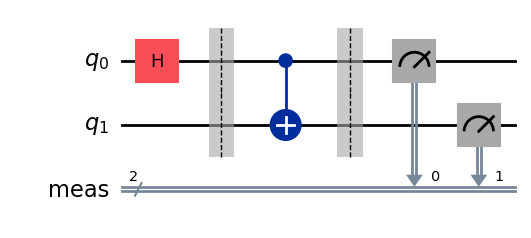

In [33]:
# Step 1: Map

from qiskit import QuantumCircuit

qc = QuantumCircuit(2)


def twobit_function(case: int):
    """
    Generate a valid two-bit function as a `QuantumCircuit`.
    """
    if case not in [1, 2, 3, 4]:
        raise ValueError("`case` must be 1, 2, 3, or 4.")

    f = QuantumCircuit(2)
    if case in [2, 3]:
        f.cx(0, 1)
    if case in [3, 4]:
        f.x(1)
    return f


# first, convert oracle circuit (above) to a single gate for drawing purposes. otherwise, the circuit is too large to display
# blackbox = twobit_function(2).to_gate()  # you may edit the number inside "twobit_function()" to select among the four valid functions
# blackbox.label = "$U_f$"

qc.h(0)
qc.barrier()
qc.compose(twobit_function(2), inplace=True)
qc.measure_all()


qc.draw("mpl")

In the above circuit, the Hadamard gate "H" takes qubit 0, which is initially in the state $|0\rangle$, to the superposition state $\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$. Then, $U_f$ evaluates the function $f(x)$ and applies that to qubit 1.

Next we need to optimize and transpile the circuit to be run on the quantum computer:



In [34]:
# Step 2: Transpile
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

qc_isa = pm.run(qc)

Finally, we execute our transpiled circuit on the quantum computer and visualize our results:



In [35]:
# Step 3: Run the job on a real quantum computer

job = sampler.run([qc_isa], shots=1)
# job = sampler_sim.run([qc_isa],shots=1) # uncomment this line to run on simulator instead
res = job.result()
counts = res[0].data.meas.get_counts()

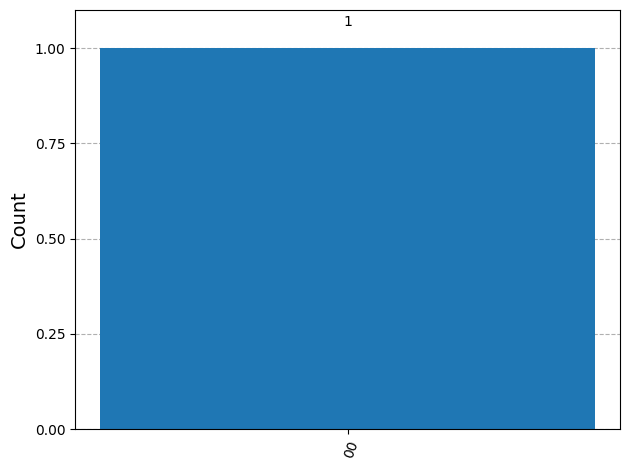

In [36]:
# Step 4: Visualize and analyze results

## Analysis
from qiskit.visualization import plot_histogram

plot_histogram(counts)

The above is a histogram of our results. Depending on the number of shots you chose to run the circuit in step 3 above, you could see one or two bars, representing the measured states of the two qubits in each shot. As always with Qiskit and in this notebook, we use "little endian" notation, meaning the states of qubits 0 through n are written in ascending order from right to left, so qubit 0 is always farthest right.

So, because qubit 0 was in a superposition state, the circuit evaluated the function for *both* $x=0$ and $x=1$ *at the same time* — something classical computers cannot do! But the catch comes when we want to learn about the function $f(x)$ — when we measure the qubits, we collapse their state. If you select "shots = 1" to only run the circuit once, you will only see one bar in the histogram above, and your information about the function will be incomplete.

#### Check your understanding

Read the question(s) below, think about your answer, then click the triangle to reveal the solution.

<details>
  <summary>
    How many times must we run the above algorithm to learn the function $f(x)$? Is this any better than the classical case? Would you rather have a classical or quantum computer to solve this problem?
  </summary>

  **Answer:**

  Since the measurement will collapse the superposition and return only one value, we need to run the circuit *at least* twice to return both outputs of the function $f(0)$ and $f(1)$. Best case, this performs as well as the classical case, where we compute both $f(0)$ and $f(1)$ in the first two queries. But there's a chance that we'll need to run it more than two times, since the final measurement is probabilistic and might return the same $f(x)$ value the first two times. I would rather have a classical computer in this case.
</details>

So, while quantum parallelism can be powerful when used in the right way, it is not correct to say that a quantum computer works just like a massive, classical parallel processor. The act of measurement collapses the quantum states, so we can only ever access a single output of the computation.



## Deutsch's algorithm

While quantum parallelism alone doesn't give us an advantage over classical computers, we can pair this with another quantum phenomena, interference, to achieve a speed-up. The algorithm now known as "Deutsch's algorithm" is the first example of an algorithm that accomplishes this.

### The problem

Here was the problem:

Given an input bit, $x = \{0,1\}$, and an input function $f(x) = \{0,1\}$, determine whether the function is *balanced* or *constant*. That is, if it's balanced, then the output of the function is 0 half the time and 1 the other half the time. If it's constant, then the output of the function is either always 0 or always 1. Recall the table of four possible functions taking a single bit to another a single bit:

| $x$ | $f_1(x)$ | $f_2(x)$ | $f_3(x)$ | $f_4(x)$ |
| --- | -------- | -------- | -------- | -------- |
| 0   | 0        | 0        | 1        | 1        |
| 1   | 0        | 1        | 0        | 1        |

The first and the last functions, $f_1(x)$ and $f_4(x)$, are constant, while the middle two functions, $f_2(x)$ and $f_3(x)$, are balanced.



### The algorithm

The way Deutsch approached this problem was through the "query model." In the query model, the input function ($f_i(x)$ above) is contained in a "black box" — we don't have direct access to its contents, but we can query the black box and it will give us the output of the function. We sometimes say that an "oracle" provides this information. See [Lesson 1: Quantum Query Algorithms](/learning/courses/fundamentals-of-quantum-algorithms/quantum-query-algorithms/introduction) of the Fundamentals of Quantum Algorithms course for more on the query model.

To determine whether a quantum algorithm is more efficient than a classical algorithm in the query model, we can simply compare the number of queries we need to make of the black box in each case. In the classical case, in order to know if the function contained in the black box were balanced or constant, we would need to query the box two times to get both $f(0)$ and $f(1)$.

In Deutsch's quantum algorithm, though, he found a way to get the information with only one query! He made one adjustment to the "quantum parallelism" circuit above, so that he prepared a superposition state on *both* qubits, instead of only on qubit 0. Then the two outputs of the function, $f(0)$ and $f(1)$ interfered to return 0 if they were either both 0 or both 1 (the function was constant), and returned 1 if they were different (the function was balanced). In this way, Deutsch could differentiate between a constant and a balanced function with a single query.

Here's a circuit diagram of Deutsch's algorithm:

To understand how this algorithm works, let's look at the quantum states of the qubits at the three points noted on the diagram above. Try to work out the states for yourself before clicking to view the answers:

#### Check your understanding

Read the questions below, think about your answers, then click the triangles to reveal the solutions.

<details>
  <summary>
    What is the state $|\pi_1\rangle$?
  </summary>

  **Answer:**

  Applying a Hadamard transforms the state $|0\rangle$ to $\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$ and the state $|1\rangle$ to  $\frac{1}{\sqrt{2}}(|0\rangle-|1\rangle)$. So, the full state becomes: $|\pi_1\rangle = [\frac{|0\rangle-|1\rangle}{\sqrt{2}}][\frac{|0\rangle+|1\rangle}{\sqrt{2}}]$
</details>

<details>
  <summary>
    What is the state $|\pi_2\rangle$?
  </summary>

  **Answer:**

  Before we apply $U_f$, remember what it does. It will change the state of qubit 1 based on the state of qubit 0. So, it makes sense to factor the state of qubit 0 out: $|\pi_1\rangle = \frac{1}{2} (|0\rangle-|1\rangle)|0\rangle+\frac{1}{2}(|0\rangle-|1\rangle)|1\rangle$. Then, if $f(0)=f(1)$, the two terms will transform in the same way and the relative sign between the two terms remains positive, but if $f(0)\neq f(1)$, then that means the second term will pick up a minus sign relative to the first term, changing the state of qubit 0 from $\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$ to $\frac{1}{\sqrt{2}}(|0\rangle-|1\rangle)$. So:

  $$
  |\pi_2\rangle = \begin{cases}
  \pm[\frac{|0\rangle-|1\rangle}{\sqrt{2}}][\frac{|0\rangle+|1\rangle}{\sqrt{2}}] & \text{if} & f(0) = f(1) \\
  \pm[\frac{|0\rangle-|1\rangle}{\sqrt{2}}][\frac{|0\rangle-|1\rangle}{\sqrt{2}}] &\text{if} & f(0) \neq f(1) \\
  \end{cases}
  $$
</details>

<details>
  <summary>
    What is the state $|\pi_3\rangle$?
  </summary>

  **Answer:**

  Now, the state of qubit 0 is either $\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$ or $\frac{1}{\sqrt{2}}(|0\rangle-|1\rangle)$, depending on the function. Applying the Hadamard will yield either $|0\rangle$ or $|1\rangle$, respectively.

  $$
  |\pi_3\rangle = \begin{cases}
  \pm[\frac{|0\rangle-|1\rangle}{\sqrt{2}}]|0\rangle & \text{if} & f(0) = f(1) \\
  \pm[\frac{|0\rangle-|1\rangle}{\sqrt{2}}]|1\rangle &\text{if} & f(0) \neq f(1) \\
  \end{cases}
  $$
</details>

Looking through your answers for the above questions, note that something a bit surprising happens. Although $U_f$ does nothing explicitly to the state of qubit 0, because it changes qubit 1 based on the state of qubit 0, it can happen that this causes a phase shift in qubit 0. This is known as the "phase-kickback" phenomenon, and is discussed in more detail in [Lesson 1: Quantum Query Algorithms](/learning/courses/fundamentals-of-quantum-algorithms/quantum-query-algorithms/introduction) of the Fundamentals of Quantum Algorithms course.

Now that we understand how this algorithm works, let's implement it with Qiskit.



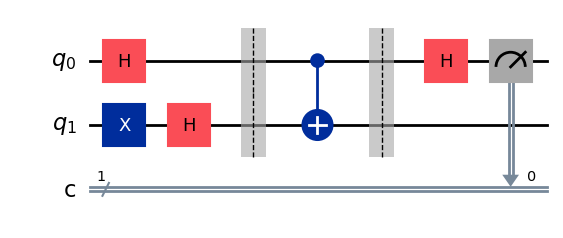

In [37]:
## Deutsch's algorithm:

## Step 1: Map the problem

# first, convert oracle circuit (above) to a single gate for drawing purposes. otherwise, the circuit is too large to display
blackbox = twobit_function(
    3
).to_gate()  # you may edit the number (1-4) inside "twobit_function()" to select among the four valid functions
blackbox.label = "$U_f$"


qc_deutsch = QuantumCircuit(2, 1)

qc_deutsch.x(1)
qc_deutsch.h(range(2))

qc_deutsch.barrier()
qc_deutsch.compose(twobit_function(2), inplace=True)
qc_deutsch.barrier()

qc_deutsch.h(0)
qc_deutsch.measure(0, 0)

qc_deutsch.draw("mpl")

In [38]:
# Step 2: Transpile
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

qc_isa = pm.run(qc_deutsch)

In [39]:
# Step 3: Run the job on a real quantum computer

job = sampler.run([qc_isa], shots=1)
# job = sampler_sim.run([qc_isa],shots=1) # uncomment this line to run on simulator instead
res = job.result()
counts = res[0].data.c.get_counts()

In [40]:
# Step 4: Visualize and analyze results

## Analysis
print(counts)
if "1" in counts:
    print("balanced")
else:
    print("constant")

{'1': 1}
balanced


## The Deutsch-Jozsa algorithm

Deutsch's algorithm was an important first step in demonstrating how a quantum computer might be more efficient than a classical computer, but it was only a modest improvement: it required just one query, compared to two in the classical case. In 1992, Deutsch and his colleague, Richard Jozsa, extended the original two-qubit algorithm to more qubits. The problem remained the same: determine whether a function is *balanced* or *constant*. But this time, the function goes from $n$ bits to a single bit. Either the function returns 0 and 1 an equal number of times (it's *balanced*) or the function returns always 1 or always 0 (it's *constant*).

This algorithm works in the same way as Deutsch's algorithm: the phase-kickback allows one to read out the state of qubit 0 to determine whether the function is constant or balanced. It's a bit trickier to see than for the two-qubit Deutsch's algorithm case, since the states will include sums over the $n$ qubits, and so working out those states will be left as an optional exercise for you at the end of the module. The algorithm will return a bitstring of all 0's if the function is constant, and a bitstring containing at least one 1 if the function is balanced.

To see how the algorithm works in Qiskit, first, we need to generate our oracle: the random function that is guaranteed to be either constant or balanced. The code below will generate a balanced function 50% of the time, and a constant function 50% of the time. Don't worry if you don't entirely follow the code — it's complicated and not necessary for our understanding of the quantum algorithm.



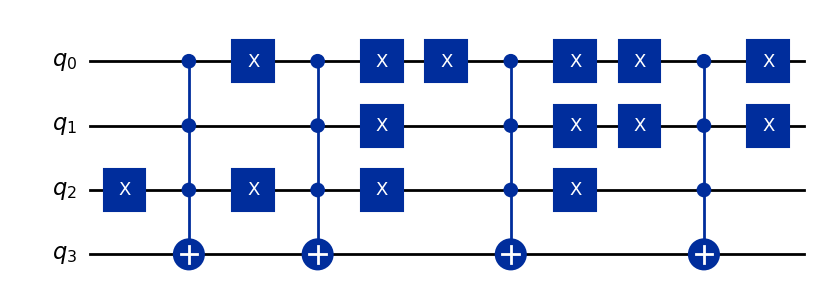

In [42]:
from qiskit import QuantumCircuit
import numpy as np
 
 
def dj_function(num_qubits):
    """
    Create a random Deutsch-Jozsa function.
    """
 
    qc_dj = QuantumCircuit(num_qubits + 1)
    if np.random.randint(0, 2):
        # Flip output qubits with 50% chance
        qc_dj.x(num_qubits)
    if np.random.randint(0, 2):
        # return constant circuit with 50% chance.
        return qc_dj
 
    # If the "if" statement above was "TRUE" then we've returned the constant
    # function and the function is complete. If not, we proceed in creating our
    # balanced function. Everything below is to produce the balanced function:
 
    # select half of all possible states at random:
    on_states = np.random.choice(
        range(2**num_qubits),  # numbers to sample from
        2**num_qubits // 2,  # number of samples
        replace=False,  # makes sure states are only sampled once
    )
 
    def add_cx(qc_dj, bit_string):
        for qubit, bit in enumerate(reversed(bit_string)):
            if bit == "1":
                qc_dj.x(qubit)
        return qc_dj
 
    for state in on_states:
        # qc_dj.barrier()  # Barriers are added to help visualize how the functions are created. They can safely be removed.
        qc_dj = add_cx(qc_dj, f"{state:0b}")
        qc_dj.mcx(list(range(num_qubits)), num_qubits)
        qc_dj = add_cx(qc_dj, f"{state:0b}")
 
    # qc_dj.barrier()
 
    return qc_dj
 
 
n = 3  # number of input qubits
 
oracle = dj_function(n)
 
display(oracle.draw("mpl"))

This is the oracle function, which is either balanced or constant. Can you see by looking at it whether the output on the last qubit depends on the values put in for the first $n$ qubits? If the output for the last qubit depends on the first $n$ qubits, can you tell if that dependent output is balanced or not?

We can tell whether the function is balanced or constant by looking at the above circuit, but remember, for the sake of this problem, we think of this function as a "black box." We can't peek into the box to look at the circuit diagram. Instead, we need to query the box.

To query the box, we use the Deutsch-Jozsa algorithm and determine whether the function is constant or balanced:



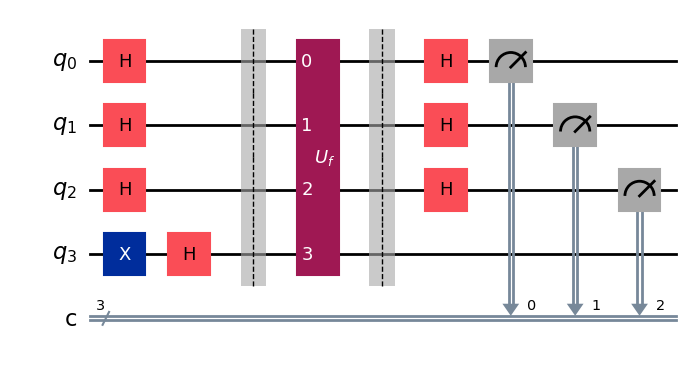

In [43]:
blackbox = oracle.to_gate()
blackbox.label = "$U_f$"


qc_dj = QuantumCircuit(n + 1, n)
qc_dj.x(n)
qc_dj.h(range(n + 1))
qc_dj.barrier()
qc_dj.compose(blackbox, inplace=True)
qc_dj.barrier()
qc_dj.h(range(n))
qc_dj.measure(range(n), range(n))

qc_dj.decompose().decompose()


qc_dj.draw("mpl")

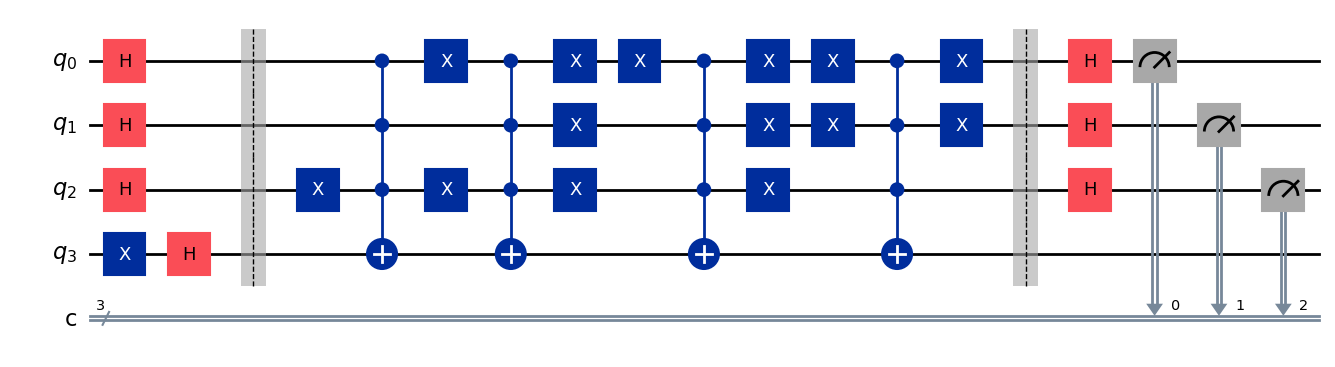

In [44]:
# Step 1: Map the problem

qc_dj = QuantumCircuit(n + 1, n)
qc_dj.x(n)
qc_dj.h(range(n + 1))
qc_dj.barrier()
qc_dj.compose(oracle, inplace=True)
qc_dj.barrier()
qc_dj.h(range(n))
qc_dj.measure(range(n), range(n))

qc_dj.decompose().decompose()


qc_dj.draw("mpl")

In [45]:
# Step 2: Transpile
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

qc_isa = pm.run(qc_dj)

In [46]:
# Step 3: Run the job on a real quantum computer

job = sampler.run([qc_isa], shots=1)
# job = sampler_sim.run([qc_isa],shots=1) # uncomment this line to run on simulator instead
res = job.result()
counts = res[0].data.c.get_counts()

In [47]:
# Step 4: Visualize and analyze results

## Analysis
print(counts)

if (
    "0" * n in counts
):  # The D-J algorithm returns all zeroes if the function was constant
    print("constant")
else:
    print("balanced")  # anything other than all zeroes means the function is balanced.

{'001': 1}
balanced


Above, the first line of the output is the bitstring of measurement outcomes. The second line outputs whether the bitstring implies that the function was balanced or constant. If the bitstring contained all zeroes, then it was constant; if not, it was balanced. So, with just a single run of the above quantum circuit, we can determine whether the function is constant or balanced!

#### Check your understanding

Read the questions below, think about your answers, then click the triangles to reveal the solutions.

<details>
  <summary>
    How many queries would it take a classical computer to determine with 100% certainty whether a function were constant or balanced? Remember, classically, a single query only allows you to apply the function to a single bitstring.
  </summary>

  **Answer:**

  There are $2^n$ possible bitstrings to check, and in the worst case, you would need to test $2^n/2+1$ of these. For example, if the function were constant, and you kept measuring "1" as the output of the function, then you couldn't be certain that it was truly constant until you checked over half of the results. Before then, you might have just been very unlucky to keep measuring "1" on a balanced function. It's like flipping a coin over and over and it landing heads every time. It's unlikely, but not impossible.
</details>

<details>
  <summary>
    How would your above answer change if you just had to just measure until one outcome (balanced or constant) is more likely than the other? How many queries would it take in this case?
  </summary>

  **Answer:**

  In this case, you could just measure twice. If the two measurements are different, you know the function is balanced. If the two measurements are the same, then it could be balanced, or it could be constant. The probability that it's balanced with this set of measurements is: $\frac{1}{2}\frac{2^n /2 - 1}{2^n-1}$. This is less than 1/2, so it's more likely that the function is constant in this case.
</details>

So, the Deutsch-Jozsa algorithm demonstrated an exponential speed-up over a *deterministic* classical algorithm (one that returns the answer with 100% certainty), but no significant speed-up over a *probabilistic* one (one that returns a result that is *likely* to be the correct answer).



### The Bernstein - Vazirani problem

In 1997, Ethan Bernstein and Umesh Vazirani used the Deutsch-Jozsa algorithm to solve a more specific, restricted problem compared to the Deutsch-Jozsa problem. Rather than simply try to distinguish between two different classes of functions, as in the D-J case, Bernstein and Vazirani used the Deutsch-Jozsa algorithm to actually learn a string encoded in a function. Here's the problem:

The function $f:\{0,1\}^n \rightarrow \{0,1\}$ still takes an $n$-bit string and outputs a single bit. But now, instead of promising that the function is balanced or constant, we're now promised that the function is the dot product between the input string $x$ and some secret $n$-bit string $s$, modulo 2. (This dot product modulo 2 is called the "binary dot product.") The problem is to figure out what the secret, $n$-bit string is.

Written another way, we're given a black-box function $f: {0,1}^n \rightarrow {0,1}$ that satisfies $f(x) = s \cdot x$ for some string $s$, and we want to learn the string $s$.

Let's take a look at how the D-J algorithm solves this problem:

1.  First, a Hadamard gate is applied to the $n$ input qubits, and a NOT gate plus a Hadamard is applied to the output qubit, making the state:

$$
|\Psi\rangle = |-\rangle_{n} \otimes |+\rangle_{n-1} \otimes |+\rangle_{n-2} \otimes ... \otimes |+\rangle_0
$$

The state of qubits 1 through $n$ can be written more simply as a sum over all $2^n$ the $n$-qubit basis states $|00...00\rangle, |00...01\rangle, |000...11\rangle, ..., |111...11\rangle$. We call the set of these basis states $\Sigma^n$. (See [Fundamentals of Quantum Algorithms](/learning/courses/fundamentals-of-quantum-algorithms/quantum-query-algorithms/deutsch-jozsa-algorithm) for more details.)

$$
|\Psi\rangle = |-\rangle \otimes \frac{1}{\sqrt{2^n}}\sum\limits_{x \in \Sigma^n}{|x\rangle}
$$

2.  Next, the $U_f$ gate is applied to the qubits. This gate will take the first n qubits as input (which are now in an equal superposition of all possible n-bit strings) and applies the function $f(x)=s \cdot x$ to the output qubit, so that this qubit is now in the state: $ |- \oplus f(x)\rangle$. Thanks to the phase kickback mechanism, the state of this qubit remains unchanged, but some of the terms in the input qubit state pick up a minus sign:

$$
|\Psi\rangle = |-\rangle \otimes \frac{1}{\sqrt{2^n}}\sum\limits_{x \in \Sigma^n}{(-1)^{f(x)}|x\rangle}
$$

3.  Now, the next set of Hadamards are applied to qubits 0 through $n-1$. Keeping track of the minus signs in this case can be tricky. It's helpful to know that applying a layer of Hadamards to $n$ qubits in a standard basis state $|x\rangle$ can be written as:

$$
H^{\otimes n} |x\rangle = \frac{1}{\sqrt{2^n}}\sum\limits_{y \in \Sigma^n}{(-1)^{x \cdot y}|y\rangle}
$$

So the state becomes:

$$
|\Psi\rangle = |-\rangle \otimes \frac{1}{2^n}\sum\limits_{x \in \Sigma^n}\sum\limits_{y \in \Sigma^n}{(-1)^{(s \cdot x) + (x \cdot y)}|y\rangle}
$$

4.  Next step is to measure the first $n$ bits. But what will we measure? It turns out that the state above simplifies to:  $|\Psi\rangle = |-\rangle \otimes |s\rangle$, but that's far from obvious. If you'd like to follow through the math, see John Watrous' [Fundamentals of Quantum Algorithms](/learning/courses/fundamentals-of-quantum-algorithms/quantum-query-algorithms/deutsch-jozsa-algorithm#the-bernstein-vazirani-problem) course. The point is, though, that the phase kickback mechanism leads to the input qubits being in the state $|s\rangle$. So, to find out what the secret string $s$ was, you simply need to measure the qubits!

#### Check your understanding

Read the questions below, think about your answers, then click the triangles to reveal the solutions.

<details>
  <summary>
    Verify that the state from Step 3 above is indeed the state $|s\rangle$ for the special case of $n=1$.
  </summary>

  **Answer:**

  When you explicitly write out the two summations, you should get a state with four terms (let's omit the output state $|-\rangle$ for this):

  $$
  |\Psi\rangle = \frac{1}{2}[|0\rangle + (-1)^s |0\rangle + |1\rangle + (-1)^{(s+1)} |1\rangle]
  $$

  If $s=0$, then the first two terms add constructively and the last two terms cancel, leaving us with $|\Psi\rangle = |0\rangle$. If $s=1$, then the last two terms add constructively and the first two terms cancel, leaving us with $|\Psi\rangle = |1\rangle$. So, in either case, $|\Psi\rangle = |s\rangle$. Hopefully this simplest case gives you a sense for how the general case with $n$ qubits works: all terms that are not $|s\rangle$ interfere away, leaving just the state $|s\rangle$.
</details>

<details>
  <summary>
    How can the same algorithm solve both the Bernstein-Vazirani and Deutsch-Jozsa problems? To make sense of this, think about Bernstein-Vazirani functions, which are of the form $f(x) = s \cdot x$. Are these functions also Deutsch-Jozsa functions? That is, determine whether functions of this form satisfy the Deutsch-Jozsa problem promise: that they're either *constant* or *balanced*. How does this help us understand how the same algorithm solves two different problems?
  </summary>

  **Answer:**

  Every Bernstein-Vazirani function of the form $f(x) = s \cdot x$ also satisfies the Deutsch-Jozsa problem promise: if s=00...00, then the function is constant (always returns 0 for every string x). If s is any other string, then the function is balanced. So, applying the Deutsch-Jozsa algorithm to one of these functions simultaneously solves both problems! It returns the string, and if that string is 00...00 then we know it's constant; if there's at least one "1" in the string, we know it's balanced.
</details>

We can also verify that this algorithm successfully solves the Bernstein-Vazirani problem by testing it experimentally. First, we create the B-V function that lives inside the black box:



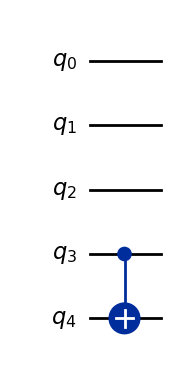

In [48]:
# Step 1: Map the problem


def bv_function(s):
    """
    Create a Bernstein-Vazirani function from a string of 1s and 0s.
    """
    qc = QuantumCircuit(len(s) + 1)
    for index, bit in enumerate(reversed(s)):
        if bit == "1":
            qc.cx(index, len(s))
    return qc


display(bv_function("1000").draw("mpl"))

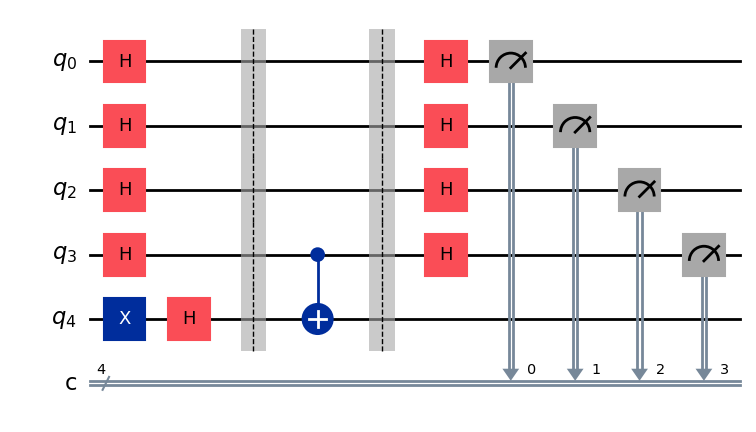

In [49]:
string = "1000"  # secret string that we'll pretend we don't know or have access to
n = len(string)
 
qc = QuantumCircuit(n + 1, n)
qc.x(n)
qc.h(range(n + 1))
qc.barrier()
# qc.compose(oracle, inplace = True)
qc.compose(bv_function(string), inplace=True)
qc.barrier()
qc.h(range(n))
qc.measure(range(n), range(n))
 
qc.draw("mpl")

In [50]:
# Step 2: Transpile
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
 
target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)
 
qc_isa = pm.run(qc)

In [51]:
# Step 3: Run the job on a real quantum computer
 
job = sampler.run([qc_isa], shots=1)
# job = sampler_sim.run([qc_isa],shots=1) # uncomment this line to run on simulator instead
res = job.result()
counts = res[0].data.c.get_counts()

In [52]:
# Step 4: Visualize and analyze results
 
## Analysis
print(counts)

{'1000': 1}


So, with just a single query, the Deutsch-Jozsa algorithm will return the string $s$ used in the function: $f(x)=x \cdot s$ when we apply it to the Bernstein-Vazirani problem. With a classical algorithm, one would need $n$ queries to solve the same problem.

## Conclusion

We hope that by examining these simple examples, we've given you a better intuition for how quantum computers are able to harness superposition, entanglement, and interference to achieve their power over classical computers.

The Deutsch-Jozsa algorithm has huge historical importance because it was the first to demonstrate any speedup over a classical algorithm, but it was only a polynomial speedup. The Deutsch-Jozsa algorithm is just the beginning of the story.

After they used the algorithm to solve their problem, Bernstein and Vazirani used this as the basis for a more complicated, recursive problem called the *recursive Fourier sampling problem*. Their solution offered a super-polynomial speedup over classical algorithms. And even before Bernstein and Vazirani, Peter Shor had already come up with his famous algorithm that enabled quantum computers to factor large numbers exponentially faster than any classical algorithm could. These results, collectively showed the exciting promise of future quantum computer, and spurred physicists and engineers to make this future a reality.



## Questions

Instructors can request versions of these notebooks with answer keys and guidance on placement in common curricula by filling out this [quick survey](https://ibm.biz/classrooms_instructor_key_request) on how the notebooks are being used.

### Critical concepts

*   the Deutsch and Deutsch-Jozsa algorithms use quantum parallelism combined with interference to find an answer to a problem faster than a classical computer can.
*   the phase kickback mechanism is a counterintuitive quantum phenomena that transfers operations on one qubit to the phase of another qubit. The Deutsch and Deutsch-Jozsa algorithms utilize this mechanism.
*   The Deutsch-Jozsa algorithm offers a polynomial speedup over any deterministic classical algorithm.
*   The Deutsch-Jozsa algorithm can be applied to a different problem, called the Bernstein-Vazirani problem, to find a hidden string encoded in a function.

### True/false

1.  T/F Deutsch's algorithm is a special case of the Deutsch-Jozsa algorithm where the input is a single qubit.
2.  T/F The Deutsch and Deutsch-Jozsa algorithms use quantum superposition and interference to achieve their efficiency.
3.  T/F The Deutsch-Jozsa algorithm requires multiple function evaluations to determine if a function is constant or balanced.
4.  T/F The "Bernstein-Vazirani algorithm" is actually the same as the Deutsch-Jozsa algorithm, applied to a different problem.
5.  T/F The Bernstein-Vazirani algorithm can find multiple secret strings simultaneously.

### Short answer

1.  How long would it take a classical algorithm to solve the Deutsch-Jozsa problem in the worst case?

2.  How long would it take a classical algorithm to solve the Bernstein-Vazirani problem? What speedup does the DJ algorithm offer in this case?

3.  Describe the phase-kickback mechanism and how it works to solve the Deutsch-Jozsa and Bernstein-Vazirani problems.

### Challenge problem

1.  The Deutsch-Jozsa algorithm: Recall that you had a question above asking you to work out the intermediate qubit states $\pi_1$, and $\pi_2$ of the Deutsch's algorithm. Do the same for the intermediate $n+1$-qubit states $\pi_1$, and $\pi_2$ of the Deutsch-Jozsa algorithm, for the specific case that $n=2$. Then, verify that $\pi_3 = |-\rangle \otimes \sum\limits_{x_0...x_n}(-1)^{f(x_0...x_n)}|x_0 ... x_n\rangle$, again, for the specific case that $n=2$.



T/F
1. True, DJ is general for n qubits, and D is only for 1
2. True
3. False, a single function is enough
4. False
5. False

Short Answer:
1. 2^(n-1) + 1
2. n reduces to 1 in quantum case
3. in DJ, the phase kickback gives the sum of + or - 1, tells the function is constant. If end with 0, the function is balanced. In BV, the phase kickback gives s as its outcome, tells the hidden string in one query.


### Reflection: Source of Quantum Advantage

The speedup comes from three steps working together:
1. **Superposition** queries all inputs at once
2. **Phase kickback** encodes $f(x)$ into phases: $|x\rangle \to (-1)^{f(x)}|x\rangle$
3. **Interference** (final Hadamard) makes constant functions give $|0\rangle^{\otimes n}$ and balanced functions give anything else

Classically, we must check $2^{n-1}+1$ inputs (worst case). Quantum needs just 1 query because we extract a *global property* (constant vs balanced) rather than individual $f(x)$ values.

# Deutsch–Jozsa Algorithm (n = 2)

## Challenge Problem Solution
This notebook cell gives a complete walkthrough of the Deutsch–Jozsa algorithm for the case \(n=2\): two input qubits plus one ancilla.

---

## Setup
- **Total qubits:** 3 (2 input + 1 ancilla)  
- Function \( f:\{0,1\}^2 \to \{0,1\} \)  
- Input basis states \( \lvert x\rangle \) for \(x \in \{00,01,10,11\}\)

---

## Initial State \(\pi_0\)
The ancilla starts in \(\lvert 1\rangle\) and both input qubits in \(\lvert 0\rangle\):
$$
\lvert \pi_0 \rangle
= \lvert 1 \rangle \otimes \lvert 0 \rangle \otimes \lvert 0 \rangle
= \lvert 1 \rangle \otimes \lvert 00 \rangle .
$$

---

## State \(\pi_1\) (after Hadamards on all qubits)
Apply \(H \otimes H \otimes H\).

Ancilla:
$$
H\lvert 1\rangle = \frac{\lvert 0\rangle - \lvert 1\rangle}{\sqrt{2}} = \lvert - \rangle .
$$

Each input qubit:
$$
H\lvert 0\rangle = \frac{\lvert 0\rangle + \lvert 1\rangle}{\sqrt{2}} .
$$

Therefore,
$$
\lvert \pi_1 \rangle
= \lvert - \rangle \otimes
\left(\frac{\lvert 0\rangle + \lvert 1\rangle}{\sqrt{2}}\right)
\otimes
\left(\frac{\lvert 0\rangle + \lvert 1\rangle}{\sqrt{2}}\right)
= \lvert - \rangle \otimes \frac{1}{2}
\left(\lvert 00\rangle + \lvert 01\rangle + \lvert 10\rangle + \lvert 11\rangle \right).
$$

In summation form:
$$
\lvert \pi_1 \rangle
= \lvert - \rangle \otimes \frac{1}{2}\sum_{x\in\{0,1\}^2} \lvert x\rangle .
$$

---

## State \(\pi_2\) (after applying the oracle \(U_x\))
The oracle acts as
$$
U_x \lvert x\rangle \lvert y\rangle = \lvert x\rangle \lvert y \oplus f(x)\rangle .
$$

With the ancilla in \(\lvert - \rangle\), this yields **phase kickback**:
$$
U_x \lvert x\rangle \lvert - \rangle = (-1)^{f(x)} \lvert x\rangle \lvert - \rangle .
$$

Applying to \(\pi_1\):
$$
\lvert \pi_2 \rangle
= \lvert - \rangle \otimes \frac{1}{2}
\sum_{x\in\{0,1\}^2} (-1)^{f(x)} \lvert x\rangle
= \lvert - \rangle \otimes \frac{1}{2}
\Big[ (-1)^{f(00)}\lvert 00\rangle + (-1)^{f(01)}\lvert 01\rangle + (-1)^{f(10)}\lvert 10\rangle + (-1)^{f(11)}\lvert 11\rangle \Big].
$$

---

## State \(\pi_3\) (after Hadamards on the input qubits)
Apply \(H \otimes H \otimes I\): Hadamard on the two inputs, identity on the ancilla.

For each input basis state,
$$
(H^{\otimes 2})\lvert x\rangle
= \frac{1}{2} \sum_{z\in\{0,1\}^2} (-1)^{x\cdot z} \lvert z\rangle,
\quad
\text{where } x\cdot z = x_0 z_0 + x_1 z_1 \pmod{2}.
$$

Thus,
$$
\lvert \pi_3 \rangle
= \lvert - \rangle \otimes \frac{1}{2} \sum_{x} (-1)^{f(x)}
\left( \frac{1}{2} \sum_{z} (-1)^{x\cdot z} \lvert z\rangle \right)
= \lvert - \rangle \otimes \frac{1}{4}
\sum_{z\in\{0,1\}^2}
\left[ \sum_{x\in\{0,1\}^2} (-1)^{f(x)+x\cdot z} \right] \lvert z\rangle .
$$

---

## Verifying the “Given Form”
The problem statement asks to verify
$$
\lvert \pi_3 \rangle \stackrel{?}{=} \lvert - \rangle \otimes
\sum_{x_0\ldots x_n} (-1)^{f(x_0\ldots x_n)} \lvert x_0\ldots x_n\rangle .
$$

**Observation:** That expression (ignoring normalization) actually matches **\(\pi_2\)**, not \(\pi_3\):
$$
\lvert \pi_2 \rangle \propto \lvert - \rangle \otimes
\sum_{x\in\{0,1\}^2} (-1)^{f(x)} \lvert x\rangle .
$$

For \(\pi_3\), the correct (normalized) expression is
$$
\lvert \pi_3 \rangle
= \lvert - \rangle \otimes \frac{1}{4}
\sum_{z\in\{0,1\}^2} \left[ \sum_{x\in\{0,1\}^2} (-1)^{f(x)+x\cdot z} \right] \lvert z\rangle .
$$

---

## Key Observation for the Measurement
For \(z=00\), we have \(x\cdot 00 = 0\) for all \(x\). Hence the amplitude of \(\lvert 00\rangle\) is
$$
\frac{1}{4}\sum_{x\in\{0,1\}^2} (-1)^{f(x)}.
$$

- If \(f\) is **constant**, the inner sum is \(\pm 4\), giving amplitude \(\pm 1\) and probability \(1\).  
- If \(f\) is **balanced**, the inner sum is \(0\), giving amplitude \(0\) and probability \(0\).

So measuring the input register yields \(\lvert 00\rangle\) with certainty iff \(f\) is constant; otherwise, one obtains a nonzero string (detecting “balanced”).

---

## Summary of States
$$
\begin{aligned}
\lvert \pi_1 \rangle
&= \lvert - \rangle \otimes \frac{1}{2}\left(\lvert 00\rangle + \lvert 01\rangle + \lvert 10\rangle + \lvert 11\rangle \right),\\[4pt]
\lvert \pi_2 \rangle
&= \lvert - \rangle \otimes \frac{1}{2}\Big[ (-1)^{f(00)}\lvert 00\rangle + (-1)^{f(01)}\lvert 01\rangle + (-1)^{f(10)}\lvert 10\rangle + (-1)^{f(11)}\lvert 11\rangle \Big],\\[4pt]
\lvert \pi_3 \rangle
&= \lvert - \rangle \otimes \frac{1}{4}
\sum_{z\in\{0,1\}^2} \left[ \sum_{x\in\{0,1\}^2} (-1)^{f(x)+x\cdot z} \right] \lvert z\rangle .
\end{aligned}
$$

**Note:** The “given form” aligns with \(\pi_2\) (up to normalization), not \(\pi_3\).


# 2025/11/2
# Quantum Teleprotation
## Introduction and background

Quantum teleportation is a technique in quantum physics that allows the transfer of quantum information from one location to another without physically moving particles. Unlike the sci-fi concept of teleportation, this process doesn't involve transporting matter. Instead, it relies on the principle of quantum entanglement, where two particles become linked regardless of distance. Through a series of precise measurements and classical communication, the quantum state of one particle can be recreated in another particle at a distant location, effectively "teleporting" the quantum information. In this module, we'll see how this works mathematically, and then we will implement quantum teleportation on a real quantum computer. The introduction here will be brief; for more background on quantum information, and more explanation about teleportation, we recommend John Watrous's course on the [Basics of quantum information](/learning/courses/basics-of-quantum-information), and in particular the section on [Teleportation.](/learning/courses/basics-of-quantum-information/entanglement-in-action/quantum-teleportation)

Classical bits can be in states 0 or 1. Quantum bits (qubits) can be in quantum states denoted $|0\rangle$ and $|1\rangle$ and also linear combinations of these states, called "superpositions", such as $|\psi\rangle = \alpha_0|0\rangle +\alpha_1|1\rangle$, with $\alpha_0,\alpha_1 \in \mathbb{C},$ and $|\alpha_0|^2+|\alpha_1|^2 = 1.$ Although the states can exist in this superposition, a measurement of the state will "collapse" it into either the $|0\rangle$ or $|1\rangle$ states. The parameters $a$ and $b$ are related to the probability of each measurement outcome according to

$$
P_0 = |\alpha_0|^2
$$

$$
P_1 = |\alpha_1|^2
$$

Hence the constraint that $|\alpha_0|^2+|\alpha_1|^2 = 1.$

Another key feature is that quantum bits can be "entangled", which means that the measurement of one qubit can affect the outcome of the measurement of another, entangled qubit. Understanding how entanglement is different from simple classical correlations is a bit tricky. Let's first explain our notation. Call two qubits belonging to friend 0 (Alice) and friend 1 (Bob), and each in the $|0\rangle$ state

$$
|0\rangle_B|0\rangle_A
$$

or

$$
|0\rangle_1|0\rangle_0
$$

sometimes shortened to simply

$$
|00\rangle
$$

Note that the lowest-numbered (or lettered) qubit is furthest to the right. This is a convention called "little-endian" notation, used throughout Qiskit.
If the two-qubit state of the friends is $|00\rangle,$ and they measure the state of their respective qubits, they will each find a 0. Similarly if the qubits were in the state $|11\rangle,$ each of their measurements would yield a 1. That is no different from the classical case. However, in quantum computing, we can combine this with superposition to obtain states like

$$
\frac{1}{\sqrt{2}}(|00\rangle+|11\rangle)
$$

In a state like this, whether Alice and Bob have qubits in the state 0 or 1 is not yet known, not even yet determined by nature, and yet we know they will measure the same state for their qubit. For example, if Bob measures his qubit to be in the state $|0\rangle,$ the only way for that to happen is if the measurement has collapsed the two-qubit state to one of the two possible states, specifically to $|00\rangle.$ That leaves Alice's qubit also in the $|0\rangle$ state.

The entangled of qubits in this way does not require that the qubits remain physically close to one another. In other words, we could entangle qubits, then separate them by a large distance, and use their entanglement to send information. An entangled state like the one above is a basic unit of entanglement, and is sometimes referred to as an "e-bit", a single bit of entanglement. These e-bits can be thought of as resources in quantum communication, since each e-bit shared between distant partners can be used, as we outline here, to move information from one location to another.

The first thought for many people learning about this for the first time is about violating relativity: can we use this to send information faster than light? By all means, keep questioning and probing scientific rules, but unfortunately this won't allow us to send information faster than light, for reasons that will become clear through the course of this module. Spoiler: amazingly it is NOT due to the speed at which this collapse propagates, which does appear to happen faster than light [\[1\]](https://www.nature.com/articles/nature15759).



We start with two collaborators Alice and Bob, who are initially in the same location and can work together on the same qubits. These collaborators will entangle their qubits. Then they will move apart to two different geographic locations, bringing their respective qubits with them. Alice will then obtain quantum information on a new qubit Q. We make no assumptions about the information on Q. The state of Q could be a secret unknown to Alice; it could be unknown to all people. But Alice is given the task of transferring the information on Q to Bob. She will do this using quantum teleportation.

To accomplish this, we will need to know some quantum operations or "gates".



## Quantum operators (gates)

Feel free to skip this section if you are already familiar with quantum gates. If you want to understand these gates better, check out [Basics of quantum information](/learning/courses/basics-of-quantum-information), especially the first two lessons, on IBM Quantum Learning.

For this teleportation protocol we will primarily use two types of quantum gates: the Hadamard gate, the CNOT gate. A few others will play a lesser role: the $X$ gate, $Z$ gate, and the SWAP gate.

This module can be completed with very limited linear algebra background, but sometimes visualizing quantum mechanical gates using matrices and vectors can be helpful. So we present here the matrix/vector forms of quantum gates/states, as well.

The states we have already presented are chosen (partly by convention and partly by constraints) to have vector forms:

$$
|0\rangle = \begin{pmatrix}1 \\ 0\end{pmatrix}
$$

$$
|1\rangle = \begin{pmatrix}0 \\ 1\end{pmatrix}
$$

In this way, an arbitrary state $|\psi\rangle = a|0\rangle+b|1\rangle$ can be written as

$$
|\psi\rangle =\begin{pmatrix}a \\ b\end{pmatrix}
$$

There is some choice in how to extend the notation to multiple-qubit states, but the choice below is quite standard:

$$
|00\rangle = \begin{pmatrix}1 \\ 0 \\ 0 \\ 0\end{pmatrix},|01\rangle = \begin{pmatrix}0 \\ 1 \\ 0 \\ 0\end{pmatrix},
|10\rangle = \begin{pmatrix}0 \\ 0 \\ 1 \\0\end{pmatrix},|11\rangle = \begin{pmatrix}0 \\ 0 \\ 0 \\ 1\end{pmatrix}.
$$

With this choice of vector notation in mind, we can introduce our needed quantum gates, their effects on quantum states, and their matrix forms.

**H Hadamard Gate:** Creates a superposition state. Single-qubit gate.

$$
H|0\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right),
$$

$$
H|1\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle-|1\rangle\right)
$$

$$
H=\frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}
$$

A circuit with a Hadamard gate is made as follows:



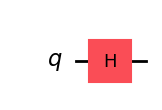

In [55]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(1)
qc.h(0)
qc.draw("mpl")

**CNOT Controlled-NOT Gate:** This gate uses two qubits: a control and a target. Checks the state of a control qubit which is not changed. But if the control qubit is in the state $|1\rangle$, the gate changes the state of the target qubit; if the state of the control qubit is $|0\rangle$ no change is made at all. In the notation below, assume the qubit $A$ (right-most qubit) is the control, and qubit $B$ (the left-most qubit) is the target. Below, the notation used is $CNOT(q_{control},q_{target})|BA\rangle.$

$$
CNOT(A,B)|00\rangle = |00\rangle, \\ CNOT(A,B)|01\rangle = |11\rangle, \\ CNOT(A,B)|10\rangle = |10\rangle, \\ CNOT(A,B)|11\rangle = |01\rangle
$$

You may sometimes see CNOT written with the order of the control and target simply implied. But there is no such ambiguity in code or in circuit diagrams.

$$
CNOT=\begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0\end{pmatrix}
$$

A CNOT gate looks a bit different in a circuit, since it requires two qubits. This is how it is implemented:



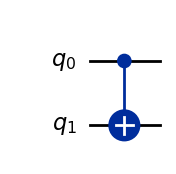

In [56]:
qc = QuantumCircuit(2)
qc.cx(0, 1)
qc.draw("mpl")

#### Check your understanding

Read the question below, think about your answer, then click the triangle to reveal the solution.

<details>
  <summary>
    Most gates have the same matrix form in Qiskit as everywhere else. But the CNOT gate acts on two qubits, and so suddenly ordering conventions of qubits becomes an issue. Texts that order qubits $|q_0,q_1,...\rangle$ will show a different matrix form for their CNOT gates. Verify by explicit matrix multiplication that the CNOT matrix above has the correct action on the state $|01\rangle.$
  </summary>

  **Answer:**

  $CNOT|01\rangle =\begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0\end{pmatrix}\begin{pmatrix}0 \\ 1 \\ 0 \\0\end{pmatrix} = \begin{pmatrix}0 \\ 0 \\ 0 \\1\end{pmatrix} = |11\rangle$
</details>



**$X$ Gate**: Equivalent to a NOT operation. Single-qubit gate.

$$
X|0\rangle = |1\rangle,\\X|1\rangle=|0\rangle
$$

$$
X=\begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}
$$

In Qiskit, creating a circuit with an $X$ gate looks like this:



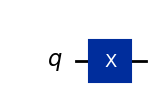

In [57]:
qc = QuantumCircuit(1)
qc.x(0)
qc.draw("mpl")

**$Z$ Gate**: Adds a "phase" to a state (a prefactor, which in the cases of the Z eigenstates $|0\rangle$ and $|1\rangle$ either a 1, or -1, respectively). Single-qubit gate.

$$
Z|0\rangle = |0\rangle,\\Z|1\rangle=-|1\rangle
$$

$$
Z=\begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}
$$

In Qiskit, creating a circuit with an $Z$ gate looks like this:



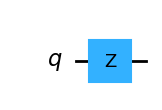

In [58]:
qc = QuantumCircuit(1)
qc.z(0)
qc.draw("mpl")

## Theory

Let's lay out the protocol for quantum teleportation using math. Then, in the next section, we'll realize this setup using a quantum computer.

**Alice and Bob entangle their qubits:** Initially, Alice's qubit and Bob's qubit are each, separately in the $|0\rangle$ state (a fine assumption and also the correct initialization for IBM® quantum computers). We can write this as $|0\rangle_B|0\rangle_A$ or simply as $|00\rangle$. Let's calculate what happens when Alice and Bob act with the Hadamard gate on Alice's qubit, and then a CNOT gate with Alice's qubit as the control and Bob's as the target:

$$
\begin{aligned}
CNOT(A,B)H_A |0\rangle_B|0\rangle_A &= CNOT(A,B)|0\rangle_B\frac{1}{\sqrt{2}}\left(|0\rangle_A+|1\rangle_A\right)\\
&=\frac{1}{\sqrt{2}}\left(CNOT(A,B)|0\rangle_B|0\rangle_A+CNOT(A,B)|0\rangle_B|1\rangle_A\right)\\
&=\frac{1}{\sqrt{2}}\left(|0\rangle_B|0\rangle_A+|1\rangle_B|1\rangle_A\right)
\end{aligned}
$$

Note that now Alice's and Bob's qubits are entangled. Although it is not yet determined by nature whether both their qubits are in the $|0\rangle$ state or the $|1\rangle$ state, it is known that their qubits are in the same state.



**Alice and Bob separate:** The two friends move their qubits to new locations, possibly very far apart. This comes with a lot of caveats: it is not trivial to move quantum information without disturbing it. But it can be moved, and indeed you will move it in this module. But keep in mind as a caveat that we expect to encounter some errors when we move quantum information around a lot.

**Q is introduced:** The secret state is prepared on qubit Q:

$$
|\psi\rangle_Q = \alpha_0 |0\rangle_Q + \alpha_1 |1\rangle_Q
$$

At this point Q is simply adjacent to Alice's qubit (A). There has been no entanglement, so the quantum state of the three qubits together can be written as:

$$
|\psi\rangle_{AB}|\psi\rangle_Q = \frac{1}{\sqrt{2}}\left(|0\rangle_B|0\rangle_A+|1\rangle_B|1\rangle_A\right)\left(\alpha_0 |0\rangle_Q + \alpha_1 |1\rangle_Q\right).
$$

The goal is to move the information on Q from Alice's location to the location of Bob. At this point, we are not making any claims or requirements about secrecy or speed of information transfer. We are simply exploring how information can move from Alice to Bob.



Because the information begins on Q, we will assume Q is assigned the lowest number in qubit numbers, such that little endian notation causes Q to be the right-most qubit in the math below.

**Alice entangles qubits A and Q:** Alice now operates with a CNOT gate with her own qubit as the control and Q as the target, then applies a Hadamard gate to Q.  Let's calculate the three-qubit state after that operation:

$$
\begin{aligned}
H_Q CNOT(A,Q)|\psi\rangle_{AB}|\psi\rangle_Q &= H_Q CNOT(A,Q)\frac{1}{\sqrt{2}}\left(|0\rangle_B|0\rangle_A+|1\rangle_B|1\rangle_A\right)\left(\alpha_0 |0\rangle_Q + \alpha_1 |1\rangle_Q\right)\\
&= H_Q CNOT(A,Q)\frac{1}{\sqrt{2}}\left(\left(\alpha_0 |0\rangle_B|0\rangle_A|0\rangle_Q + \alpha_1 |0\rangle_B|0\rangle_A|1\rangle_Q\right)+\left(\alpha_0 |1\rangle_B|1\rangle_A|0\rangle_Q + \alpha_1 |1\rangle_B|1\rangle_A|1\rangle_Q\right)\right)\\
&= H_Q \frac{1}{\sqrt{2}}\left(\alpha_0 |0\rangle_B|0\rangle_A|0\rangle_Q + \alpha_1 |0\rangle_B|1\rangle_A|1\rangle_Q+\alpha_0 |1\rangle_B|1\rangle_A|0\rangle_Q + \alpha_1 |1\rangle_B|0\rangle_A|1\rangle_Q\right)\\
&= \frac{1}{2}\left(\alpha_0 |0\rangle_B|0\rangle_A|0\rangle_Q + \alpha_0 |0\rangle_B|0\rangle_A|1\rangle_Q + \alpha_1 |0\rangle_B|1\rangle_A|0\rangle_Q-\alpha_1 |0\rangle_B|1\rangle_A|1\rangle_Q\right)\\
&+\frac{1}{2}\left(\alpha_0 |1\rangle_B|1\rangle_A|0\rangle_Q + \alpha_0 |1\rangle_B|1\rangle_A|1\rangle_Q + \alpha_1 |1\rangle_B|0\rangle_A|0\rangle_Q - \alpha_1 |1\rangle_B|0\rangle_A|1\rangle_Q\right)
\end{aligned}
$$



Because A and Q are in the same location, let us group the terms above according to the outcomes of measurements on qubits A and Q:

$$
\begin{aligned}
|\psi\rangle = \frac{1}{2}\left((\alpha_0 |0\rangle_B+\alpha_1 |1\rangle_B)|0\rangle_A|0\rangle_Q +  (\alpha_0 |0\rangle_B-\alpha_1 |1\rangle_B)|0\rangle_A|1\rangle_Q + (\alpha_1 |0\rangle_B+\alpha_0 |1\rangle_B)|1\rangle_A|0\rangle_Q+ (-\alpha_1 |0\rangle_B+\alpha_0 |1\rangle_B)|1\rangle_A|1\rangle_Q \right)\\
\end{aligned}
$$

#### Check your understanding

Read the question below, think about your answer, then click the triangle to reveal the solution.

<details>
  <summary>
    Given the expression above for the states of all three qubits, what is the probability that a measurement of qubits A and Q yields $|0\rangle_A|0\rangle_Q?$
  </summary>

  **Answer:**

  25%. To see this, recall that Bob's state must be normalized, so
  $ |_A \langle0|_Q\langle0| \frac{1}{2} |0\rangle_A|0\rangle_Q (\alpha_0 |0\rangle_B+\alpha_1 |1\rangle_B)|^2 = \frac{1}{4}|(\alpha_0 |0\rangle_B+\alpha_1 |1\rangle_B)|^2 = \frac{1}{4}$
</details>



00, 01, 10, 11 shares the probabilty equally, meanning it will be 1/4

Now, Alice can measure qubits A and Q . She cannot control the outcome of that measurement, since quantum measurements are probabilistic. So when she measures, there are 4 possible outcomes and all 4 are equally likely: $|0\rangle_A|0\rangle_Q,$ $|0\rangle_A|1\rangle_Q,$ $|1\rangle_A|0\rangle_Q,$ and $|1\rangle_A|1\rangle_Q.$ Note that each outcome has different implications for Bob's qubit. For example, if Alice finds her qubits to be in $|0\rangle_A|0\rangle_Q,$ that has collapsed the entire, 3-qubit quantum state to $(\alpha_0|0\rangle_B+\alpha_1|1\rangle_B)|0\rangle_A|0\rangle_Q.$ Other measurement outcomes for Alice yield different states for Bob. These are collected together in the table below.



| Alice outcome                        | Bob's state                                          | Instruction to Bob | Result                                              |
| ------------------------------------ | ---------------------------------------------------- | ------------------ | --------------------------------------------------- |
| $ \vert 0\rangle_A \vert 0\rangle_Q$ | $\alpha_0\vert 0\rangle_B+\alpha_1\vert 1\rangle_B$  | None               | $\alpha_0\vert 0\rangle_B+\alpha_1\vert 1\rangle_B$ |
| $ \vert 0\rangle_A \vert 1\rangle_Q$ | $\alpha_0\vert 0\rangle_B-\alpha_1\vert 1\rangle_B$  | $Z$                | $\alpha_0\vert 0\rangle_B+\alpha_1\vert 1\rangle_B$ |
| $ \vert 1\rangle_A \vert 0\rangle_Q$ | $\alpha_1\vert 0\rangle_B+\alpha_0\vert 1\rangle_B$  | $X$                | $\alpha_0\vert 0\rangle_B+\alpha_1\vert 1\rangle_B$ |
| $ \vert 1\rangle_A \vert 1\rangle_Q$ | $-\alpha_1\vert 0\rangle_B+\alpha_0\vert 1\rangle_B$ | $X$ then $Z$       | $\alpha_0\vert 0\rangle_B+\alpha_1\vert 1\rangle_B$ |



For all the possible measurement outcomes on Alice's qubits, Bob's qubit is left in a state vaguely resembling the secret state originally on Q. In the case where Alice measures $|0\rangle_C|0\rangle_A$ (the first row of the table), Bob's qubit is left in exactly the secret state! In the other cases, there is something off about the state. The coefficients ($\alpha$'s) are swapped, or there is a "-" sign where there should be a "+" sign, or both. In order to modify Bob's qubit to make it exactly equal to the secret state, Alice must call Bob (use some means of classical communication) and tell Bob to perform additional operations on his qubit, as outlined in the table. For example, in the third row the coefficients are swapped. If Alice calls Bob and tells him to apply an $X$ gate to his qubit, it changes a $|0\rangle$ to a $|1\rangle$ and vice-versa, and out comes the secret state.

It should now be clear why we can't use this setup to send information faster than light. We might get lucky and measure $|0\rangle_A|0\rangle_Q,$ meaning Bob has exactly the secret state, instantly. But Bob doesn't know that until we call him and tell him "We measured $|0\rangle_A|0\rangle_Q$, so you don't have to do anything."

In the thought experiment, the qubits are often physically separated and taken to a new location. IBM® quantum computers use solid-state qubits on a chip that can't be separated. So instead of moving Alice and Bob to different locations, we will separate the information on the chip itself by using so-called "swap gates" to move the information from one qubit to another.



## Experiment 1: Basic teleportation

IBM Quantum recommends tackling quantum computing problems using a framework we call "Qiskit patterns". It consists of the following steps.

*   Step 1: Map your problem to a quantum circuit
*   Step 2: Optimize your circuit for running on real quantum hardware
*   Step 3: Execute your job on IBM quantum computers using Runtime Primitives
*   Step 4: Post-process the results

### Step 1: Map your problem to a quantum circuit

All the math we did above was outlining step 1. We will implement it now, building our quantum circuit using Qiskit! We start creating a quantum circuit with three qubits, and entangling the two qubits of Alice and Bob. We will take these to be qubits 1 and 2, and we will reserve qubit 0 for the secret state.



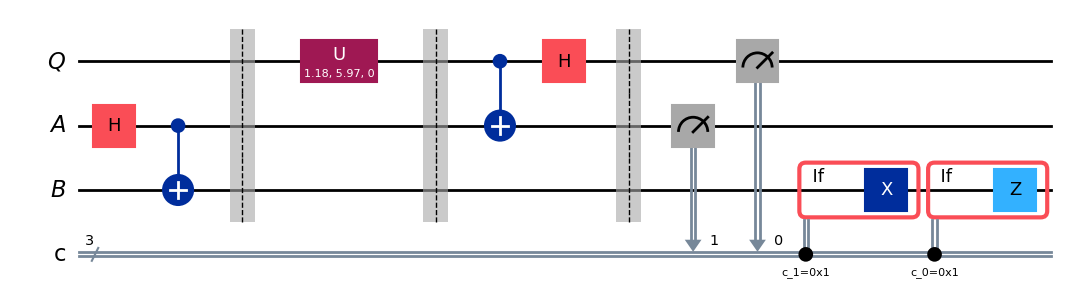

In [59]:
# Step 1: Map your problem to a quantum circuit

# Import some general packages
from qiskit import ClassicalRegister, QuantumCircuit, QuantumRegister
import numpy as np

# Define registers
secret = QuantumRegister(1, "Q")
Alice = QuantumRegister(1, "A")
Bob = QuantumRegister(1, "B")

cr = ClassicalRegister(3, "c")

qc = QuantumCircuit(secret, Alice, Bob, cr)

# We entangle Alice's and Bob's qubits as in our work above. We apply a Hadamard gate and then a CNOT gate.
# Note that the second argument in the CNOT gate is the target.
qc.h(Alice)
qc.cx(Alice, Bob)

# Inserting a barrier changes nothing about the logic. It just allows us to force gates to be positioned in "layers".
qc.barrier()

# Now we will use random variables to create the secret state. Don't worry about the "u" gate and the details.
np.random.seed(42)  # fixing seed for repeatability
theta = np.random.uniform(0.0, 1.0) * np.pi  # from 0 to pi
varphi = np.random.uniform(0.0, 2.0) * np.pi  # from 0 to 2*pi

# Assign the secret state to the qubit on the other side of Alice's (qubit 0), labeled Q
qc.u(theta, varphi, 0.0, secret)
qc.barrier()

# Now entangle Q and Alice's qubits as in the discussion above.
qc.cx(secret, Alice)
qc.h(secret)
qc.barrier()

# Now Alice measures her qubits, and stores the outcomes in the "classical registers" cr[]
qc.measure(Alice, cr[1])
qc.measure(secret, cr[0])

# Now we insert some conditional logic. If Alice measures Q in a "1" we need a Z gate, and if Alice measures A in a "1" we need an X gate (see the table).
with qc.if_test((cr[1], 1)):
    qc.x(Bob)
with qc.if_test((cr[0], 1)):
    qc.z(Bob)

qc.draw(output="mpl")

That's all we have to do to get Alice's state teleported to Bob. However, recall that when we measure a quantum state $\alpha_0 |0\rangle+\alpha_1|1\rangle$ we find either $|0\rangle$ or $|1\rangle.$ So at the end of all this, Bob definitely has Alice's secret state, but we can't easily verify this with a measurement. In order for a measurement to tell us that we did this correctly, we have to do a trick. We had an operator labeled "U" for "unitary" which we used to prepare Alice's secret state. We can apply the inverse of U at the end of our circuit. If U mapped Alice's $|0\rangle$ state into $\alpha_0 |0\rangle+\alpha_1|1\rangle$, then the inverse of U will map Bob's $\alpha_0 |0\rangle+\alpha_1|1\rangle$ back to $|0\rangle.$ So this last part wouldn't necessarily be done if the goal were just to move quantum information. This is only done for us to check ourselves.



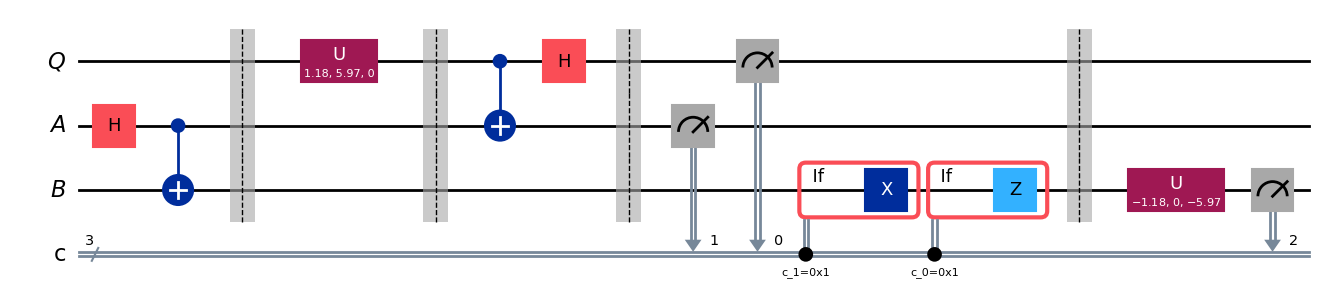

In [60]:
# Add the inverse of U and measure Bob's qubit.
qc.barrier()

qc.u(theta, varphi, 0.0, Bob).inverse()  # inverse of u(theta,varphi,0.0)
qc.measure(Bob, cr[2])  # add measurement gate

qc.draw(output="mpl")

So if we've done this correctly, our measurement on Bob's qubit should yield a $|0\rangle$ state. Of course, these measurements are probabilistic. So if there is even a small chance of measuring Bob's qubit to be in the $|1\rangle$ state, then a single measurement could result in $|1\rangle.$ We would really want to make many measurements to be assured that the probability of $|0\rangle$ is quite high.

### Step 2: Optimize problem for quantum execution

This step takes the operations we want to perform and expresses them in terms of the functionality of a specific quantum computer. It also maps our problem onto the layout of the quantum computer.

We will start by loading several packages that are required to communicate with IBM quantum computers. We must also select a backend on which to run. We can either choose the least busy backend, or select a specific backend whose properties we know.

There is code below for saving your credentials upon first use. Be sure to delete this information from the notebook after saving it to your environment, so that your credentials are not accidentally shared when you share the notebook. See [Set up your IBM Cloud account](/docs/guides/initialize-account) and [Initialize the service in an untrusted environment](/docs/guides/cloud-setup-untrusted) for more guidance.

In [61]:
# Load the Qiskit Runtime service
from qiskit_ibm_runtime import QiskitRuntimeService

# Load the Qiskit Runtime service

# Syntax for first saving your token.  Delete these lines after saving your credentials.
# QiskitRuntimeService.save_account(channel='ibm_quantum_platform', instance = '<YOUR_IBM_INSTANCE_CRN>', token='<YOUR-API_KEY>', overwrite=True, set_as_default=True)
# service = QiskitRuntimeService(channel='ibm_quantum_platform')

# Load saved credentials
service = QiskitRuntimeService()

# Use the least busy backend, or uncomment the loading of a specific backend like "ibm_brisbane".
backend = service.least_busy(operational=True, simulator=False, min_num_qubits=127)
# backend = service.backend("ibm_brisbane")
print(backend.name)

management.get:WARNING:2025-11-01 19:14:06,603: Loading default saved account


ibm_fez


In [63]:
from qiskit.circuit import IfElseOp

backend.target.add_instruction(IfElseOp, name="if_else_01")

Now we must "transpile" the quantum circuit. This involves many sub-steps and is a fascinating topic. Just to give an example of a sub-step: not all quantum computers can directly implement all logical gates in Qiskit. We must write the gates from our circuit in terms of gates the quantum computer can implement. We can carry out that process, and others, using a preset pass manager. Setting `optimization = 3` (the highest level of optimization) ensures that the mapping from our abstract quantum circuit to the instructions given to the quantum computer is as efficient as our pre-processing can get it.



In [64]:
# Step 2: Transpile
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)
qc_isa = pm.run(qc)

A "Sampler" is a primitive designed to sample possible states resulting from a quantum circuit, and collect statistics on what states might be measured and with what probability. We import the Qiskit Runtime Sampler here:



In [65]:
# Load the Runtime primitive and session
from qiskit_ibm_runtime import SamplerV2 as Sampler

sampler = Sampler(mode=backend)

Not all computations on a quantum computer can be reasonably simulated on classical computers. This simple teleportation definitely can be, but it isn't at all surprising that we can classically save information in one place or another. We strongly recommend carrying out these calculations using a real IBM quantum computer. But in case you have exhausted your free monthly use, or if something must be completed in class and can't wait in the queue, this module can be completed using a simulator. To do this, simply run the cell below and uncomment the associated lines in the "Execute" steps.



In [67]:
# Load the backend sampler
from qiskit.primitives import BackendSamplerV2

# Load the Aer simulator and generate a noise model based on the currently-selected backend.
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel


noise_model = NoiseModel.from_backend(backend)

# Define a simulator using Aer, and use it in Sampler.
backend_sim = AerSimulator(noise_model=noise_model)
sampler_sim = BackendSamplerV2(backend=backend_sim)

# Alternatively, load a fake backend with generic properties and define a simulator.
# backend_gen = GenericBackendV2(num_qubits=18)
# sampler_gen = BackendSamplerV2(backend=backend_gen)

### Step 3: Execute

Use the sampler to run your job, with the circuit as an argument.



In [68]:
job = sampler.run([qc_isa])
# job = sampler_sim.run([qc_isa])
res = job.result()
counts = res[0].data.c.get_counts()

### Step 4: Post-processing and analysis

Let's plot the results and interpret them.



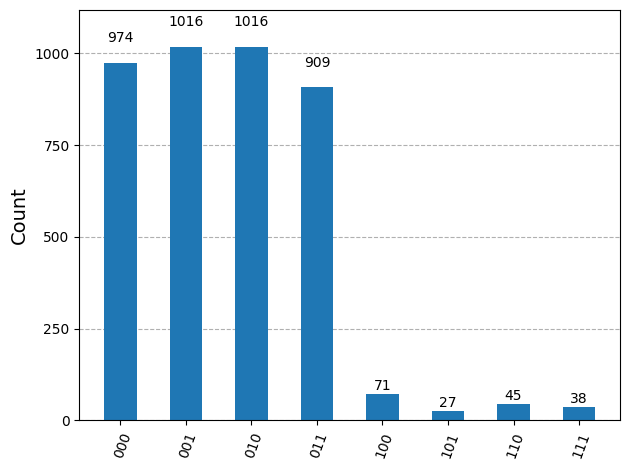

In [69]:
# This required 5 s to run on a Heron r2 processor on 10-28-24
from qiskit.visualization import plot_histogram

plot_histogram(counts)

#### Check your understanding

Read the question below, think about your answer, then click the triangle to reveal the solution.

<details>
  <summary>
    Which of the states above indicate successful teleportation, and how can you tell?
  </summary>

  **Answer:**

  The states $|000\rangle,$ $|001\rangle,$ $|010\rangle,$ $|011\rangle$ are all consistent with successful teleportation. This is because we added a gate to undo the initial preparation of the secret state. If the secret state was successfully teleported to Bob's qubit, that additional gate should return Bob's qubit to the $|0\rangle$ state. So any state above with Bob's qubit (qubit 0, also measured to the 0th component of the classical register, and hence the highest/right-most) in the $|0\rangle$ state indicates success.
</details>

This plot is showing all measurement outcomes for the three qubits, over 5,000 trials or "shots". We pointed out earlier that Alice would measure all possible states for qubits A and Q with equal likelihood. We assigned qubits 0-2 in the circuit to Q, A, and B, in that order. In little-endian notation, Bob's qubit is the left-most/lowest. So the four bars on the left correspond to Bob's qubit being $|0\rangle$, and the other two qubits being in all possible combinations with roughly equal probability. Note that almost all (usually \~95%) of measurements yield Bob's qubit in the $|0\rangle$ state, meaning our setup was successful! There are a handful of shots (\~5%) that yielded Bob's qubit in the $|1\rangle$ state. That should not logically be possible. However, all modern quantum computers suffer from noise and errors to a much greater extent than classical computers. And quantum error correction is still an emerging field.



## Experiment 2: Teleporting across a processor

Arguably, the most interesting part of quantum teleportation is that a quantum state can be teleported over long distances instantly (though the classical communication of extra gates is not instant). As already stated, we can't break qubits off the processor and move them around. But we can move the information from one qubit to another, until the qubits involved in teleportation are on opposite sides of the processor. Let us repeat the steps we took above, but now we will make a larger circuit with enough qubits to span the processor.

### Step 1: Map your problem to a quantum circuit

This time, the qubits corresponding to Alice and Bob will change. So we will not name a single qubit "A" and another "B". Rather, we will number the qubits and use variables to represent the current position of the information on qubits belonging to Alice and Bob. All other steps except the swap gates are as described previously.



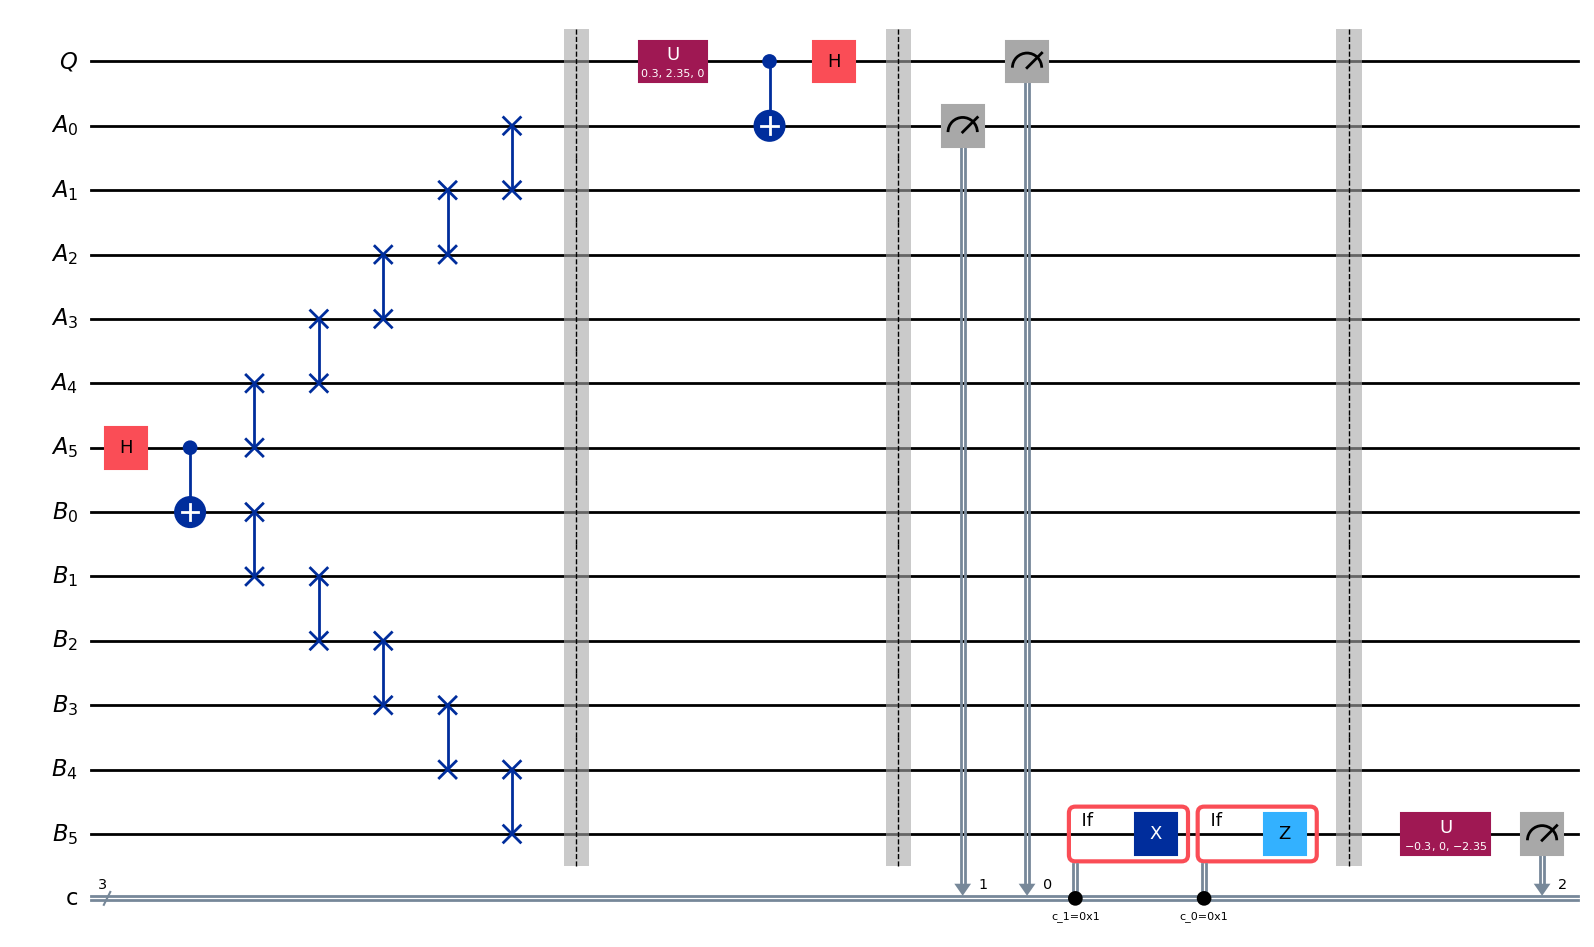

In [70]:
# Step 1: Map

# Define registers
qr = QuantumRegister(13, "q")

qc = QuantumCircuit(qr, cr)

# Define registers
secret = QuantumRegister(1, "Q")
ebitsa = QuantumRegister(6, "A")
ebitsb = QuantumRegister(6, "B")
# q = ClassicalRegister(1, "q meas")
# a = ClassicalRegister(1, "a")
# b = ClassicalRegister(1, "b")
cr = ClassicalRegister(3, "c")
qc = QuantumCircuit(secret, ebitsa, ebitsb, cr)

# We'll start Alice in the middle of the circuit, then move information outward in both directions.
Alice = 5
Bob = 0
qc.h(ebitsa[Alice])
qc.cx(ebitsa[Alice], ebitsb[Bob])

# Starting with Bob and Alice in the center, we swap their information onto adjacent qubits, until the information is on distant qubits.

for n in range(Alice):
    qc.swap(ebitsb[Bob], ebitsb[Bob + 1])
    qc.swap(ebitsa[Alice], ebitsa[Alice - 1])
    Alice = Alice - 1
    Bob = Bob + 1

qc.barrier()

# Create a random state for Alice (qubit zero)
np.random.seed(42)  # fixing seed for repeatability
# theta = np.random.uniform(0.0, 1.0) * np.pi    #from 0 to pi
theta = 0.3
varphi = np.random.uniform(0.0, 2.0) * np.pi  # from 0 to 2*pi


qc.u(theta, varphi, 0.0, secret)

# Entangle Alice's two qubits
qc.cx(secret, ebitsa[Alice])
qc.h(secret)

qc.barrier()

# Make measurements of Alice's qubits and store the results in the classical register.
qc.measure(ebitsa[Alice], cr[1])
qc.measure(secret, cr[0])

# Send instructions to Bob's qubits based on the outcome of Alice's measurements.
with qc.if_test((cr[1], 1)):
    qc.x(ebitsb[Bob])
with qc.if_test((cr[0], 1)):
    qc.z(ebitsb[Bob])

qc.barrier()

# Invert the preparation we did for Carl's qubit so we can check whether we did this correctly.
qc.u(theta, varphi, 0.0, ebitsb[Bob]).inverse()  # inverse of u(theta,varphi,0.0)
qc.measure(ebitsb[Bob], cr[2])  # add measurement gate

qc.draw("mpl")

You can see in the circuit diagram that the logical steps are the same. The only difference is that we used the swap gates to bring Alice's qubit's state from qubit 6 ($A_5$) up to qubit 1 ($A_0$), right next to Q. And we used swap gates to bring Bob's initial state from qubit 7 ($B_0$) down to qubit 12 ($B_5$). Note that the state on qubit 12 is not even related to Q's secret state until measurements are made on the distant qubits 0 and 1, and the state on qubit 12 is not equal to the secret state until after the conditional $X$ and $Z$ gates are applied.

### Step 2: Optimize your circuit

Normally, when we use the pass manager to transpile and optimize our circuits, it makes sense to set `optimization_level = 3`, because we want our circuits to be as efficient as possible. In this case, there is no computational reason for us to transfer states from qubits 6 and 7 over to qubits 1 and 12. That was just something we did to demonstrate teleportation over a distance. If we ask the pass manager to optimize our circuit, it will realize there is no logical reason for these swap gates, and it will remove them and carry out the gate operations on adjacent qubits. So for this special case, we use `optimization_level = 0`.



In [71]:
# Step 2: Transpile
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target = backend.target
pmzero = generate_preset_pass_manager(target=target, optimization_level=0)

qc_isa_zero = pmzero.run(qc)

print(qc_isa_zero.depth())

55


### Step 3: Execute

As before, we recommend running on real IBM quantum computers. If your monthly free usage has been reached, feel free to uncomment the simulator cells to run on a simulator.



In [72]:
# This required 5 s to run on a Heron r2 processor on 10-28-24
job = sampler.run([qc_isa_zero])
# job = sampler_sim.run([qc_isa_zero])
counts = job.result()[0].data.c.get_counts()

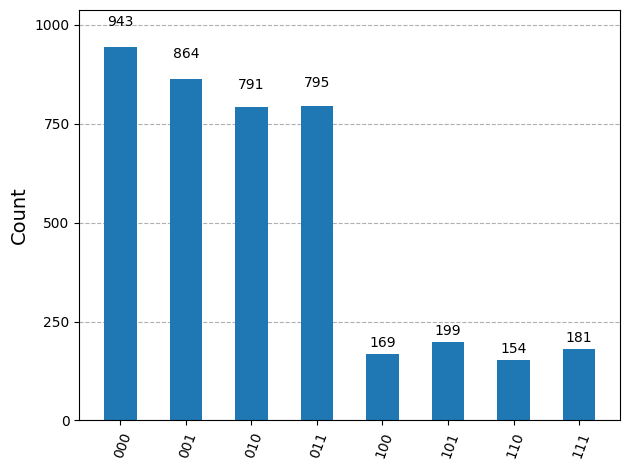

In [73]:
from qiskit.visualization import plot_histogram

plot_histogram(counts)

### Step 4: Classical post-processing

Again we see that the probabilities for the possible outcomes for Alice's qubits are fairly uniform. There is a strong preference for finding Bob's qubit in $|0\rangle$ after inverting the secret code, meaning there is a strong probability that we correctly teleported the secret state across the processor from Q to Bob (qubits 0 to 12). However, we note that there is now about a higher chance of *not* measuring $|0\rangle$ for Bob. This is an important lesson in quantum computing: the more gates you have, especially multi-qubit gates like swap gates, the more noise and errors you will encounter.



## Questions

Instructors can request versions of these notebooks with answer keys and guidance on placement in common curricula by filling out this [quick survey](https://ibm.biz/classrooms_instructor_key_request) on how the notebooks are being used.

### Critical concepts

*   Qubits can be entangled, meaning a measurement of one qubit affects or even determines the state of another qubit.
*   Entanglement differs from classical correlations; for example, qubits A and B could be in a superposition of states like $\alpha_0|00\rangle+\alpha_1|11\rangle.$ The state of A or B could be undetermined by nature, and yet A and B could still be guaranteed to be in the same state.
*   Through a combination of entanglements and measurements, we can transfer a state (which can store information) from one qubit to another. This transfer can even be done over long distances, and this is called quantum teleportation.
*   Quantum teleportation relies on quantum measurements, which are probabilistic. Thus, classical communication can be necessary to tweak the teleported states. This prevents quantum teleportation from moving information faster than light. Quantum teleportation does not violate relativity or causality.
*   Modern quantum computers are more susceptible to noise and errors than classical computers. Expect a few percent error.
*   The more gates you add in sequence (especially 2-qubit gates) the more errors and noise you can expect.

### True/False questions

1.  T/F Quantum teleportation can be used to send information faster than light.
2.  T/F Modern evidence suggests that the collapse of a quantum state propagates faster than light.
3.  T/F In Qiskit, qubits are ordered in states with the lowest-numbered qubit on the right, as in $|q_3,q_2,q_1, q_0\rangle$

### MC questions

1.  Qubits A and B are entangled, then separated by a great distance $d$. Qubit A is measured. Which statement is correct about the speed at which the state of qubit B is affected?

*   a. Qubit B is affected instantly, within experimental tolerance, in experiments run so far.
*   b. Qubit B is affected after a time $d/c$, meaning the quantum state "collapses" at approximately the speed of light, within experimental tolerance.
*   c. Qubit B is affected only after classical communication has occurred, meaning it happens in a time longer than $d/c$.
*   d. None of the above

2.  Recall that measurement probability is related to amplitudes in quantum states. For example, if a qubit is initially in the state $\alpha_0|0\rangle+\alpha_1 |1\rangle,$ the probability of measuring the state $|0\rangle$ is $|\alpha_0|^2.$ Not all sets of measurements will exactly match these probabilities, due to finite sampling (just as flipping a coin might yield heads twice in a row). The measurement histogram below could correspond to which of the following quantum states? Select the best option.

![entangled\_teleportation\_fig](/learning/images/modules/computer-science/quantum-teleportation/entangled_teleportation_fig.avif)

*   a. $|0\rangle$
*   b. $\frac{1}{\sqrt{2}}\left(|0\rangle-|1\rangle\right)$
*   c. $\frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right)$
*   d. $\frac{4}{5}|0\rangle+\frac{3}{5}|1\rangle$
*   e. $\frac{3}{5}|0\rangle+\frac{4}{5}|1\rangle$

3.  Which of the following states show(s) qubits A and B entangled? Select all that apply.

*   a. $\frac{1}{\sqrt{2}}\left(|0\rangle_B|0\rangle_A+|1\rangle_B|1\rangle_A\right)$
*   b. $\frac{4}{5}|0\rangle_B|0\rangle_A+\frac{3}{5}|1\rangle_B|1\rangle_A$
*   c. $\frac{1}{\sqrt{2}}\left(|0\rangle_B|1\rangle_A-|1\rangle_B|0\rangle_A\right)$
*   d. $\frac{1}{\sqrt{2}}\left(|0\rangle_B|0\rangle_A+|1\rangle_B|0\rangle_A\right)$
*   e. $|0\rangle_B|0\rangle_A$

4.  In this module, we prepared an entangled state: $\frac{1}{\sqrt{2}}\left(|0\rangle_B|0\rangle_A+|1\rangle_B|1\rangle_A\right).$ But there are many other entangled states one could use for a similar protocol. Which of the states below could yield a 2-qubit measurement histogram like the following? Select the best response.

![entangled\_teleportation\_fig\_0110](/learning/images/modules/computer-science/quantum-teleportation/entangled_teleportation_fig_0110.avif)

*   a. $\frac{1}{\sqrt{2}}\left(|0\rangle_B|0\rangle_A+|1\rangle_B|1\rangle_A\right)$
*   b. $\frac{4}{5}|0\rangle_B|0\rangle_A+\frac{3}{5}|1\rangle_B|1\rangle_A$
*   c. $\frac{1}{\sqrt{2}}\left(|0\rangle_B|1\rangle_A-|1\rangle_B|0\rangle_A\right)$
*   d. $\frac{4}{5}|0\rangle_B|1\rangle_A+\frac{3}{5}|1\rangle_B|0\rangle_A$
*   e. $|0\rangle_B|0\rangle_A$

### Discussion questions

1.  Describe the quantum teleportation protocol, from start to finish, to your partner/group. See if they have anything to add, or if they have questions.

2.  Is there anything unique about the initial entangled state between Alice and Bob: $\frac{1}{\sqrt{2}}\left(|0\rangle_B|0\rangle_A+|1\rangle_B|1\rangle_A\right)?$ If so, what is unique about it? If not, what other entangled states could we have used?



T/F
1. No, A must share with B the comment to reverse the qubit, which is limited under speed of light
2. False
3. True

MC: 
1. d
2. e
3. a,b,c
4. c

DQ:
1. did that to my roommate Berry, who understand nothing about Quantum physics, seems work well?
2. No, only remember that if we use other states we should edit the comment send from alice to bob, make sure that bob reverse the qubits successfully.